# Import Data

In [1]:
import pandas as pd
vessels = pd.read_csv('./data/vessel_data.csv')

# Quickly Inspect Data

In [2]:
vessels.head()

,ship_id,ship_name,latitude,longitude,time,dim_a,dim_b,dim_c,dim_d,length,width,eta_day,eta_hour,eta_minute,eta_month,destination,ship_type,ship_heading,ship_speed
0,304997000,WILSON DIRDAL,60.125667,19.102500,2024-01-04 09:14:59.591590409 +0000 UTC,75.0,13.0,5.0,8.0,88.0,13.0,4.0,11.0,0.0,1.0,FOR ORDER,79.0,138.0,7.2
1,236111925,SOUND SOLUTION,59.354483,17.964942,2024-01-04 09:15:21.493471037 +0000 UTC,12.0,13.0,4.0,6.0,25.0,10.0,28.0,9.0,0.0,12.0,STOCKHOLM,52.0,254.0,0.0
2,265518880,RESCUE BURRE,57.418768,16.677853,2024-01-04 09:15:13.416253033 +0000 UTC,6.0,6.0,2.0,2.0,12.0,4.0,31.0,23.0,59.0,12.0,SWEDISH SAR VESSEL,51.0,87.0,0.0
3,265585310,JUPITER,59.388627,18.327317,2024-01-04 09:15:12.400625784 +0000 UTC,43.0,43.0,9.0,9.0,86.0,18.0,0.0,24.0,60.0,0.0,LJUSTERO<>OSTANA :-),65.0,147.0,0.0
4,265647200,ASKHOLMEN,59.538273,18.750687,2024-01-04 09:15:29.444613983 +0000 UTC,15.0,6.0,3.0,3.0,21.0,6.0,10.0,12.0,0.0,8.0,KLINTSUNDET,99.0,511.0,0.1


In [3]:
vessels.describe()

,ship_id,latitude,longitude,dim_a,dim_b,dim_c,dim_d,length,width,eta_day,eta_hour,eta_minute,eta_month,ship_type,ship_heading,ship_speed
count,1.044550e+05,104455.000000,104455.000000,104455.000000,104455.000000,104455.000000,104455.000000,104455.000000,104455.000000,98391.000000,98391.000000,98391.000000,98391.000000,104455.000000,104455.000000,104455.000000
mean,2.628631e+08,59.370264,18.239236,31.559839,24.321172,5.375367,5.219827,55.880657,10.594792,6.632853,16.477645,28.782267,2.670722,60.293677,260.224633,1.683273
std,4.232936e+07,0.754695,1.206846,39.637900,35.148147,4.719525,4.158590,54.761558,7.474291,9.555279,8.509205,28.400862,4.162113,15.217793,166.625934,5.697757
min,2.091510e+08,57.119887,15.057477,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,2.558059e+08,59.052332,17.631297,8.000000,8.000000,2.000000,2.000000,18.000000,5.000000,0.000000,11.000000,0.000000,0.000000,51.000000,107.000000,0.000000
50%,2.655305e+08,59.331030,18.099177,12.000000,15.000000,4.000000,4.000000,31.000000,8.000000,2.000000,19.000000,30.000000,1.000000,60.000000,256.000000,0.000000
75%,2.656494e+08,59.626517,18.705295,34.000000,24.000000,7.000000,7.000000,83.000000,14.000000,8.000000,24.000000,60.000000,3.000000,70.000000,345.000000,0.100000
max,6.360221e+08,61.344530,21.761195,506.000000,426.000000,63.000000,61.000000,887.000000,92.000000,31.000000,28.000000,62.000000,14.000000,252.000000,511.000000,102.300000


In [4]:
vessels.isnull().sum()

ship_id             0
ship_name        2303
latitude            0
longitude           0
time                0
dim_a               0
dim_b               0
dim_c               0
dim_d               0
length              0
width               0
eta_day          6064
eta_hour         6064
eta_minute       6064
eta_month        6064
destination     22084
ship_type           0
ship_heading        0
ship_speed          0
dtype: int64

# Quick Plot

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

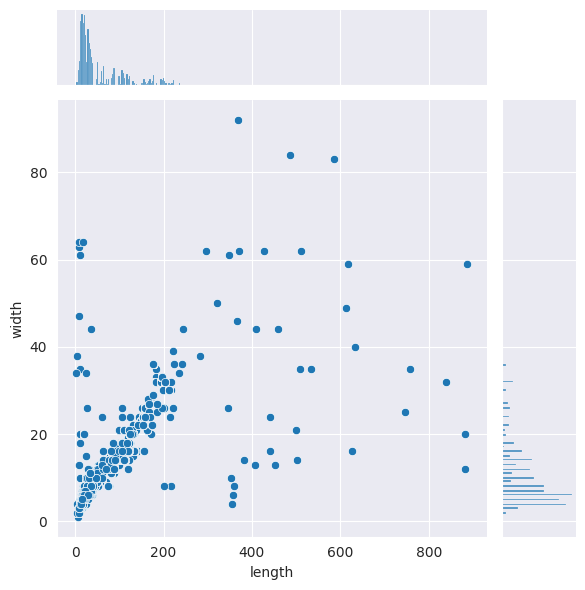

In [6]:
sns.jointplot(x='length', y='width', data=vessels)

# Unique Number of Vessels in Data

In [7]:
num_unique_values = vessels['ship_id'].nunique()
num_unique_values

634

# Most Common Ship IDs

In [8]:
ship_id_counts = vessels['ship_id'].value_counts()
most_common_ship_ids = ship_id_counts.head(10)
most_common_ship_ids

ship_id
265522620    518
231805000    518
265628500    518
265674760    517
265604520    517
265871000    517
246824000    517
265558290    517
231849000    516
265585310    516
Name: count, dtype: int64

# Alter Timestamps for Pandas Compatibility

In [9]:
vessels_timestamp_fix = vessels.copy()
vessels_timestamp_fix['time'] = pd.to_datetime(vessels['time'].str.replace(" UTC", ""), format='%Y-%m-%d %H:%M:%S.%f %z')
vessels_timestamp_fix

,ship_id,ship_name,latitude,longitude,time,dim_a,dim_b,dim_c,dim_d,length,width,eta_day,eta_hour,eta_minute,eta_month,destination,ship_type,ship_heading,ship_speed
0,304997000,WILSON DIRDAL,60.125667,19.102500,2024-01-04 09:14:59.591590409+00:00,75.0,13.0,5.0,8.0,88.0,13.0,4.0,11.0,0.0,1.0,FOR ORDER,79.0,138.0,7.2
1,236111925,SOUND SOLUTION,59.354483,17.964942,2024-01-04 09:15:21.493471037+00:00,12.0,13.0,4.0,6.0,25.0,10.0,28.0,9.0,0.0,12.0,STOCKHOLM,52.0,254.0,0.0
2,265518880,RESCUE BURRE,57.418768,16.677853,2024-01-04 09:15:13.416253033+00:00,6.0,6.0,2.0,2.0,12.0,4.0,31.0,23.0,59.0,12.0,SWEDISH SAR VESSEL,51.0,87.0,0.0
3,265585310,JUPITER,59.388627,18.327317,2024-01-04 09:15:12.400625784+00:00,43.0,43.0,9.0,9.0,86.0,18.0,0.0,24.0,60.0,0.0,LJUSTERO<>OSTANA :-),65.0,147.0,0.0
4,265647200,ASKHOLMEN,59.538273,18.750687,2024-01-04 09:15:29.444613983+00:00,15.0,6.0,3.0,3.0,21.0,6.0,10.0,12.0,0.0,8.0,KLINTSUNDET,99.0,511.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104450,265532910,NaN,59.328862,18.088587,2024-01-08 18:14:47.305849861+00:00,20.0,10.0,2.0,4.0,30.0,6.0,NaN,NaN,NaN,NaN,NaN,36.0,511.0,0.0
104451,265650810,NaN,59.354137,18.050013,2024-01-08 18:16:40.183182999+00:00,4.0,8.0,2.0,2.0,12.0,4.0,NaN,NaN,NaN,NaN,NaN,37.0,511.0,0.0
104452,265702750,ESTELLE,58.488998,16.942075,2024-01-08 18:18:57.083635955+00:00,4.0,9.0,2.0,2.0,13.0,4.0,NaN,NaN,NaN,NaN,NaN,60.0,240.0,0.0
104453,230985650,OSMERUS,60.520253,21.659818,2024-01-08 18:18:13.852976473+00:00,5.0,10.0,4.0,1.0,15.0,5.0,7.0,20.0,30.0,12.0,TUOMARAINEN,30.0,94.0,0.1


# Inspect Vessel 246108000 more Closely

In [10]:
vessel_selected = vessels_timestamp_fix[vessels_timestamp_fix['ship_id'] == 246108000]
vessel_selected_min_time = vessel_selected['time'].min()
vessel_selected_time_in_duration = vessel_selected.copy()
# To try duration instead of timestamps, uncomment
# vessel_selected_time_in_duration['time'] = vessel_selected['time'] - vessel_selected_min_time
# vessel_selected_time_in_duration['time'] = vessel_selected_time_in_duration['time'].dt.total_seconds()
vessel_selected_time_in_duration

,ship_id,ship_name,latitude,longitude,time,dim_a,dim_b,dim_c,dim_d,length,width,eta_day,eta_hour,eta_minute,eta_month,destination,ship_type,ship_heading,ship_speed
8885,246108000,WISBY WAVE,59.517912,16.961328,2024-01-04 19:57:53.984478330+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,34.0,1.0
9753,246108000,WISBY WAVE,59.515653,17.173890,2024-01-04 20:57:34.242143556+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,114.0,11.6
9885,246108000,WISBY WAVE,59.494937,17.216570,2024-01-04 21:07:45.204131004+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,161.0,10.4
10056,246108000,WISBY WAVE,59.469733,17.241995,2024-01-04 21:18:05.395513689+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,150.0,9.7
10296,246108000,WISBY WAVE,59.446705,17.283057,2024-01-04 21:28:05.521804592+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,110.0,12.3
10406,246108000,WISBY WAVE,59.438252,17.349572,2024-01-04 21:38:14.656971880+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,101.0,12.4
10575,246108000,WISBY WAVE,59.426593,17.405925,2024-01-04 21:47:33.422812199+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,143.0,12.2
10645,246108000,WISBY WAVE,59.392845,17.434115,2024-01-04 21:57:53.743653231+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,155.0,12.8
10844,246108000,WISBY WAVE,59.361375,17.462662,2024-01-04 22:07:33.775010500+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,153.0,13.0
10958,246108000,WISBY WAVE,59.332775,17.505717,2024-01-04 22:17:54.821588069+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,129.0,12.7


# See When 246108000 Was Close to the Bridges 

In [11]:
# Area close to the bridges
min_latitude, min_longitude = 59.05765799405289, 17.532700031035117
max_latitude, max_longitude = 59.29963293997548, 17.78611651007986

vessel_selected_time_in_duration[
    (vessel_selected_time_in_duration['latitude'] >= min_latitude) & (vessel_selected_time_in_duration['latitude'] <= max_latitude) &
    (vessel_selected_time_in_duration['longitude'] >= min_longitude) & (vessel_selected_time_in_duration['longitude'] <= max_longitude)
]

,ship_id,ship_name,latitude,longitude,time,dim_a,dim_b,dim_c,dim_d,length,width,eta_day,eta_hour,eta_minute,eta_month,destination,ship_type,ship_heading,ship_speed
11350,246108000,WISBY WAVE,59.273390,17.571160,2024-01-04 22:37:43.509390945+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,165.0,13.0
11455,246108000,WISBY WAVE,59.243477,17.592293,2024-01-04 22:47:44.418524413+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,155.0,8.8
11581,246108000,WISBY WAVE,59.222598,17.608800,2024-01-04 22:57:54.544783720+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,180.0,6.1
11761,246108000,WISBY WAVE,59.206842,17.620340,2024-01-04 23:08:04.523916435+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,140.0,6.2
11936,246108000,WISBY WAVE,59.196305,17.631238,2024-01-04 23:18:44.845058106+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,164.0,2.4
12158,246108000,WISBY WAVE,59.193243,17.632057,2024-01-04 23:27:55.598579130+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,172.0,0.0
12236,246108000,WISBY WAVE,59.193238,17.632062,2024-01-04 23:38:15.308817660+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,174.0,0.0
12409,246108000,WISBY WAVE,59.187687,17.635343,2024-01-04 23:48:14.512521842+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,142.0,4.2
12559,246108000,WISBY WAVE,59.181758,17.656263,2024-01-04 23:58:08.716041863+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,143.0,4.6
12710,246108000,WISBY WAVE,59.165812,17.666068,2024-01-05 00:08:06.728505316+00:00,102.0,14.0,15.0,0.0,116.0,15.0,6.0,20.0,0.0,1.0,SE GOT,80.0,175.0,7.0


# Check Validity of 246108000 ETA Data

In [12]:
vessel_selected_time_in_duration[['ship_id', 'eta_day', 'eta_hour', 'eta_minute', 'eta_month']].describe()

,ship_id,eta_day,eta_hour,eta_minute,eta_month
count,46.0,46.0,46.0,46.0,46.0
mean,246108000.0,6.0,20.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0
min,246108000.0,6.0,20.0,0.0,1.0
25%,246108000.0,6.0,20.0,0.0,1.0
50%,246108000.0,6.0,20.0,0.0,1.0
75%,246108000.0,6.0,20.0,0.0,1.0
max,246108000.0,6.0,20.0,0.0,1.0


It is not valid as it never changes (std = 0).

# Inspect 246108000 Speed over Time

In [13]:
vessel_selected_time_in_duration[vessel_selected_time_in_duration['ship_id'] == 246108000][['time', 'ship_speed']].sort_values('time').set_index('time')

,ship_speed
time,
2024-01-04 19:57:53.984478330+00:00,1.0
2024-01-04 20:57:34.242143556+00:00,11.6
2024-01-04 21:07:45.204131004+00:00,10.4
2024-01-04 21:18:05.395513689+00:00,9.7
2024-01-04 21:28:05.521804592+00:00,12.3
2024-01-04 21:38:14.656971880+00:00,12.4
2024-01-04 21:47:33.422812199+00:00,12.2
2024-01-04 21:57:53.743653231+00:00,12.8
2024-01-04 22:07:33.775010500+00:00,13.0


# See if Ship Type Data is Valid

In [14]:
# Group by ship_id and find ship_id where ship_type is not the same for all entries
ship_id_bad_types = list(vessels.sort_values('ship_id')['ship_id'].unique()[vessels.groupby('ship_id')['ship_type'].nunique() != 1])
ship_id_bad_types

[209720000,
 210332000,
 212255000,
 215768000,
 230041000,
 230169180,
 230361000,
 230995650,
 244710678,
 244874000,
 245237000,
 246430000,
 246447000,
 246521000,
 246554000,
 255806258,
 255806372,
 255806390,
 255806464,
 255806522,
 257037270,
 257600000,
 259372000,
 265001130,
 265004000,
 265011360,
 265192000,
 265505410,
 265508900,
 265509180,
 265512110,
 265518280,
 265519440,
 265520390,
 265520430,
 265522440,
 265522480,
 265522490,
 265522510,
 265522680,
 265522690,
 265522700,
 265530850,
 265535300,
 265546890,
 265546910,
 265547830,
 265547840,
 265549180,
 265562890,
 265565600,
 265567430,
 265576690,
 265584790,
 265585310,
 265586630,
 265586850,
 265602050,
 265606890,
 265609080,
 265609530,
 265609580,
 265611390,
 265614020,
 265629200,
 265632540,
 265633770,
 265663480,
 265666670,
 265675220,
 265704520,
 265721770,
 265745880,
 265762770,
 265810010,
 265819600,
 265828560,
 265828570,
 265828640,
 266026000,
 266203000,
 266271000,
 266470000,
 266

It is not valid as some ships have reported more than 1 type

## See What Types the Ships Sending Multiple Types have Sent

In [15]:
vessels[vessels['ship_id'].isin(ship_id_bad_types)].groupby('ship_id')['ship_type'].unique()

ship_id
209720000    [70.0, 51.0]
210332000    [73.0, 70.0]
212255000    [79.0, 70.0]
215768000    [60.0, 69.0]
230041000    [60.0, 93.0]
                 ...     
266470000    [89.0, 70.0]
266666000    [22.0, 60.0]
276817000    [61.0, 60.0]
277569000    [64.0, 60.0]
311000787    [60.0, 61.0]
Name: ship_type, Length: 87, dtype: object

## See if at least Vessels Near the Bridges have Sent Consistent Data

In [16]:
# Vessels inside bounding box
vessels_nearby_bridge = vessels[
    (vessels['latitude'] >= min_latitude) & (vessels['latitude'] <= max_latitude) &
    (vessels['longitude'] >= min_longitude) & (vessels['longitude'] <= max_longitude)
]

# Vessels nearby that have where ship_type is not the same for all entries
nearby_ship_id_bad_types = list(vessels_nearby_bridge.sort_values('ship_id')['ship_id'].unique()[vessels_nearby_bridge.groupby('ship_id')['ship_type'].nunique() != 1])
nearby_ship_id_bad_types

[]

They have.. But it still cannot be guaranteed that they continue to do so.

# See Where All Vessels Have Appeared Last in the Dataset

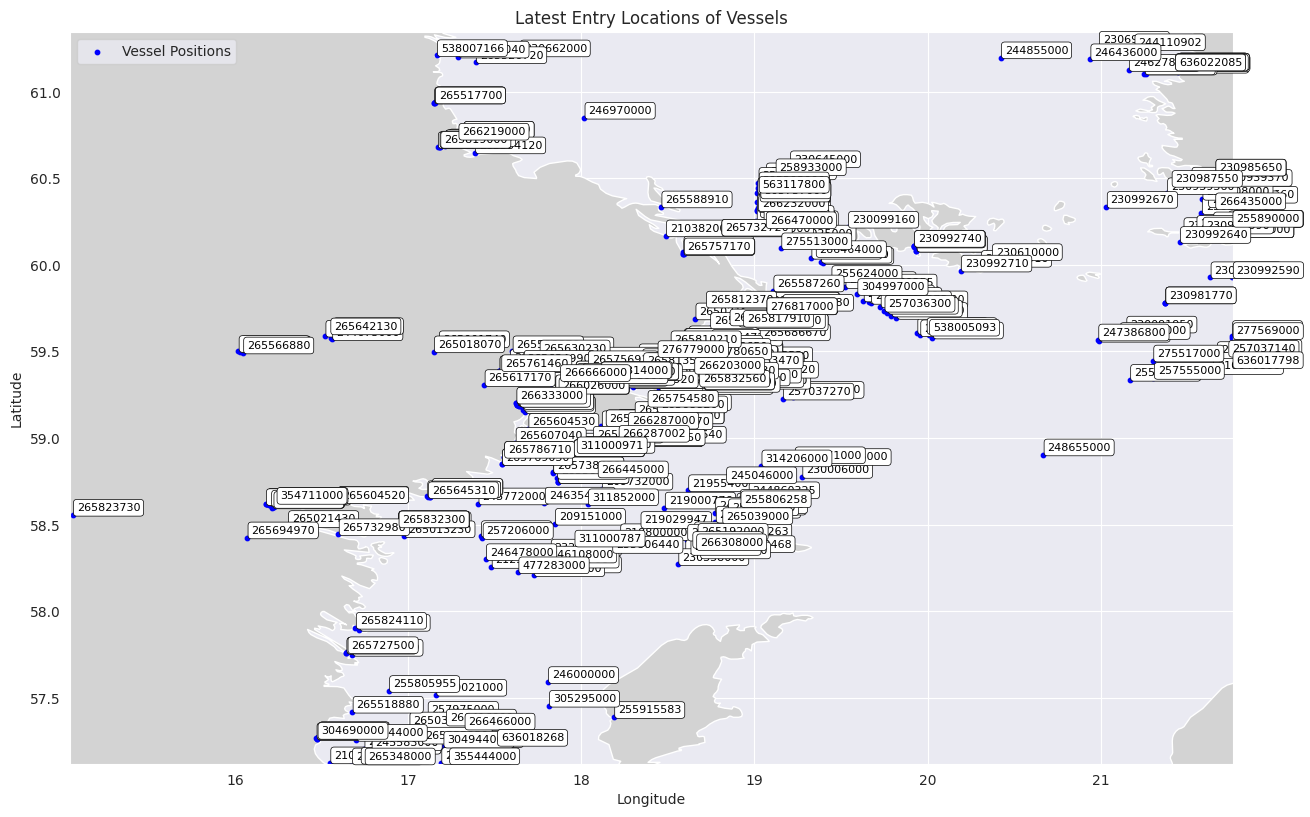

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Sort the DataFrame by 'ship_id' and 'time' in descending order
vessels_sorted = vessels_timestamp_fix.sort_values(by=['ship_id', 'time'], ascending=[True, False])

# Drop duplicates keeping the last entry for each 'ship_id', which is the most recent one
last_entries = vessels_sorted.drop_duplicates(subset='ship_id', keep='first')

# Creating a GeoDataFrame
gdf = gpd.GeoDataFrame(
    last_entries, geometry=gpd.points_from_xy(last_entries.longitude, last_entries.latitude))

# Load a simple world map
# Download all from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
# and save in ./map 
world = gpd.read_file('./map/ne_10m_admin_0_countries.shp')

# Original Bounding Box where Vessels are Logged
min_latitude, min_longitude = 57.11950799373074, 15.048625225719368
max_latitude, max_longitude = 61.345101156944445, 21.76127140685429

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue', label='Vessel Positions')

# Annotate each point with the ship_id in black text with a white background
for idx, row in gdf.iterrows():
    ax.annotate(text=row['ship_id'], xy=(row['longitude'], row['latitude']),
                xytext=(3, 3), textcoords='offset points', fontsize=8,
                color='black', bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=0.5))


# Setting the bounds for the plot
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

plt.title('Latest Entry Locations of Vessels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Quite a few vessels..

# See Which Vessels are Close to The Bridges

All vessels that have been close to the bridges:
[244140468 253361000 266333000 314206000 245046000 211286440 266471000
 265192000 246108000 355444000 231025000 245286000 209151000 265623120
 265552100 265587230 265513400 265768340 232035207 212153000 232031869
 209720000 245237000 258042000 210253000 265632240 265046740 244590000
 265782800 210855000]
Total: 30


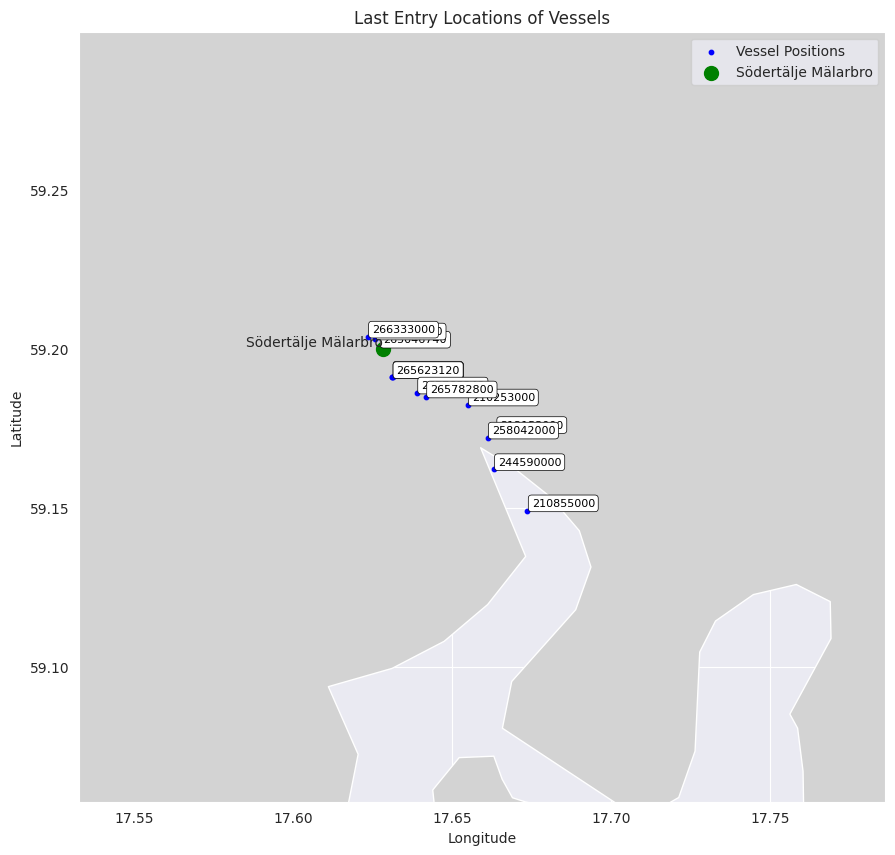

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Selecting the first entry for each unique ship_id
# first_entries = vessels.drop_duplicates(subset='ship_id')

# Sort the DataFrame by 'ship_id' and 'time' in descending order
vessels_sorted = vessels_timestamp_fix.sort_values(by=['ship_id', 'time'], ascending=[True, False])

# Drop duplicates keeping the last entry for each 'ship_id', which is the most recent one
last_entries = vessels_sorted.drop_duplicates(subset='ship_id', keep='first')

# Creating a GeoDataFrame
gdf = gpd.GeoDataFrame(
    last_entries, geometry=gpd.points_from_xy(last_entries.longitude, last_entries.latitude))

# Load a simple world map
# Download all from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
# and save in ./map 
world = gpd.read_file('./map/ne_10m_admin_0_countries.shp')

# Zoomed in Bounding Box Close to Bridges
min_latitude, min_longitude = 59.05765799405289, 17.532700031035117
max_latitude, max_longitude = 59.29963293997548, 17.78611651007986

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=10, color='blue', label='Vessel Positions')

# Annotate each point with the ship_id in black text with a white background
for idx, row in gdf.iterrows():
    ax.annotate(text=row['ship_id'], xy=(row['longitude'], row['latitude']),
                xytext=(3, 3), textcoords='offset points', fontsize=8,
                color='black', bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=0.5))

# Locations, names and colors for the markers
locations = {
    'Södertälje Mälarbro': (59.19985816310993, 17.628248643747433, "green"),
    # 'Södertälje Slussbron': (59.19208613713749, 17.632432295743072, "purple"), # Bridge is no longer available
    # 'Södertäljebron': (59.18484242934431, 17.64303000707334, "orange") # Bridge is no longer available
}

# Add markers and labels for each location
for name, (lat, lon, color) in locations.items():
    ax.scatter(lon, lat, color=color, s=100, label=name)
    ax.text(lon, lat, name, fontsize=10, ha='right', va='bottom')

# Setting the bounds for the plot
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

# Vessels that have at some point been close to the bridges
inside_bbox = vessels[
    (vessels['latitude'] >= min_latitude) & (vessels['latitude'] <= max_latitude) &
    (vessels['longitude'] >= min_longitude) & (vessels['longitude'] <= max_longitude)
]

# Get the unique ship_ids
print("All vessels that have been close to the bridges:")
unique_ship_ids = inside_bbox['ship_id'].unique()
print(unique_ship_ids)
print("Total:", len(unique_ship_ids))

plt.title('Last Entry Locations of Vessels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Inspect Path of 266471000

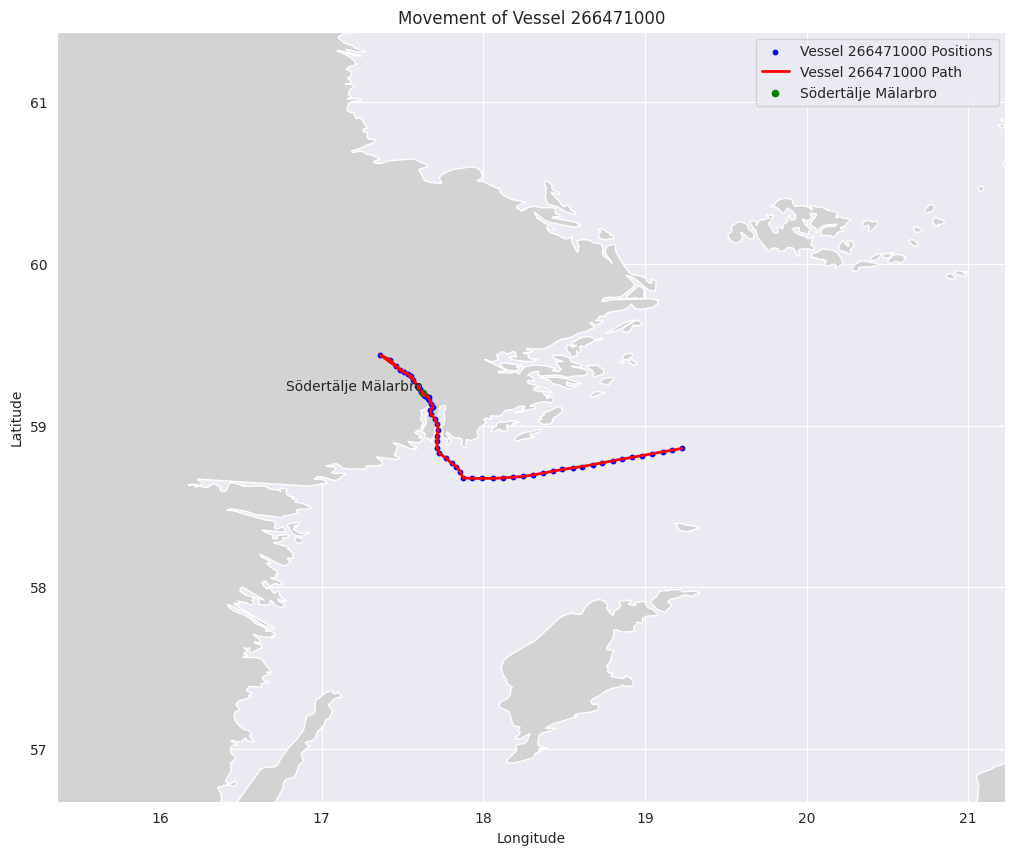

In [19]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Choose a specific ship_id to track
specific_ship_id = 266471000

# Filter the DataFrame for the specific ship_id
specific_vessel = vessels[vessels['ship_id'] == specific_ship_id]

# Sort by time to ensure the path is plotted correctly
specific_vessel = specific_vessel.sort_values('time')

# Creating a GeoDataFrame for the specific vessel
specific_gdf = gpd.GeoDataFrame(
    specific_vessel, geometry=gpd.points_from_xy(specific_vessel.longitude, specific_vessel.latitude))

# Load a simple world map
# Download all from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
# and save in ./map 
world = gpd.read_file('./map/ne_10m_admin_0_countries.shp')

# Correcting the bounding box coordinates
min_longitude, min_latitude, max_longitude, max_latitude = specific_gdf.total_bounds

# Zoom out a bit
#zoom_out = 0.001
zoom_out = 2
#zoom_out = 0
min_longitude -= zoom_out
min_latitude -= zoom_out
max_longitude += zoom_out
max_latitude += zoom_out

# Plotting with the corrected bounding box
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Create a LineString object from the vessel positions
line = LineString(list(specific_gdf.geometry.values))

# Locations, names and colors for the markers
locations = {
    'Södertälje Mälarbro': (59.19985816310993, 17.628248643747433, "green"),
    # 'Södertälje Slussbron': (59.19208613713749, 17.632432295743072, "purple"), # Bridge is no longer available
    # 'Södertäljebron': (59.18484242934431, 17.64303000707334, "orange") # Bridge is no longer available
}

# Plot the vessel positions
specific_gdf.plot(ax=ax, markersize=10, color='blue', label=f'Vessel {specific_ship_id} Positions')

# Plot the line of the vessel path
ax.plot(*line.xy, color='red', linewidth=2, label=f'Vessel {specific_ship_id} Path')

# Add markers and labels for each location
for name, (lat, lon, color) in locations.items():
    ax.scatter(lon, lat, color=color, s=20, label=name)  # Markers
    ax.text(lon, lat, name, fontsize=10, ha='right', va='bottom')  # Labels

# Setting the bounds for the plot
ax.set_xlim([min_longitude, max_longitude])
ax.set_ylim([min_latitude, max_latitude])

plt.title(f'Movement of Vessel {specific_ship_id}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


# Generalize Vessel Path Plotting

In [22]:
def plot_vessel(specific_ship_id):
    import matplotlib.pyplot as plt
    import geopandas as gpd
    from shapely.geometry import LineString, Point
    
    # Filter the DataFrame for the specific ship_id
    specific_vessel = vessels[vessels['ship_id'] == specific_ship_id]
    
    # Sort by time to ensure the path is plotted correctly
    specific_vessel = specific_vessel.sort_values('time')
    
    # Convert "2024-01-04 14:06:40.206825682 +0000 UTC" time to "2024-01-04 14:06:40"
    specific_vessel['time'] = specific_vessel['time'].str.split('.').str[0] 
    
    # Print table specific_vessel and only columns 'time', 'latitude', 'longitude'
    print(specific_vessel[['time', 'latitude', 'longitude', 'ship_name']])
    
    # Convert the filtered DataFrame to a GeoDataFrame with a 'geometry' column
    specific_gdf = gpd.GeoDataFrame(
        specific_vessel,
        geometry=[Point(xy) for xy in zip(specific_vessel.longitude, specific_vessel.latitude)]
    )
    
    try:
    
        # Create a LineString object from the vessel positions
        line = LineString(list(specific_gdf.geometry.values))
        
        # Load a simple world map
        # Download all from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/
        # and save in ./map 
        world = gpd.read_file('./map/ne_10m_admin_0_countries.shp')
        
        # Correcting the bounding box coordinates
        min_longitude, min_latitude, max_longitude, max_latitude = specific_gdf.total_bounds
        
        # Zoom out a bit
        #zoom_out = 0.001
        zoom_out = 0.01
        #zoom_out = 0.05
        #zoom_out = 2
        #zoom_out = 0
        min_longitude -= zoom_out
        min_latitude -= zoom_out
        max_longitude += zoom_out
        max_latitude += zoom_out
        
        # Locations, names and colors for the markers
        locations = {
            'Södertälje Mälarbro': (59.19985816310993, 17.628248643747433, "green"),
            # 'Södertälje Slussbron': (59.19208613713749, 17.632432295743072, "purple"), # Bridge is no longer available
            # 'Södertäljebron': (59.18484242934431, 17.64303000707334, "orange") # Bridge is no longer available
        }
        
        # Plotting with the corrected bounding box
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))
        world.plot(ax=ax, color='lightgrey')
        
        # Plot the vessel positions
        specific_gdf.plot(ax=ax, markersize=10, color='blue', label=f'Vessel {specific_ship_id} Positions')
        
        # Plot the line of the vessel path
        ax.plot(*line.xy, color='red', linewidth=2, label=f'Vessel {specific_ship_id} Path')
        
        # Add markers and labels for each location
        for name, (lat, lon, color) in locations.items():
            ax.scatter(lon, lat, color=color, s=100, label=name)  # Markers
            ax.text(lon, lat, name, fontsize=10, ha='right', va='bottom')  # Labels
        
        # Setting the bounds for the plot
        ax.set_xlim([min_longitude, max_longitude])
        ax.set_ylim([min_latitude, max_latitude])
        
        plt.title(f'Movement of Vessel {specific_ship_id}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"Could not plot path for: {specific_ship_id}")
        print(f"Reson: ", e)


# Plot Paths of All Vessels that Have Been Close to the Bridges

                      time   latitude  longitude  ship_name
5      2024-01-04 09:15:34  59.171000  17.664350  GREENLAND
268    2024-01-04 09:25:13  59.183433  17.650200  GREENLAND
351    2024-01-04 09:35:23  59.187850  17.635300  GREENLAND
520    2024-01-04 09:45:24  59.192150  17.632417  GREENLAND
675    2024-01-04 09:55:54  59.192567  17.632333  GREENLAND
...                    ...        ...        ...        ...
43312  2024-01-06 03:24:53  58.502883  18.382867  GREENLAND
43553  2024-01-06 03:35:00  58.485633  18.432283  GREENLAND
43797  2024-01-06 03:45:22  58.468717  18.483000  GREENLAND
44395  2024-01-06 04:15:42  58.420083  18.633100  GREENLAND
45477  2024-01-06 04:55:22  58.346250  18.822917  GREENLAND

[66 rows x 4 columns]


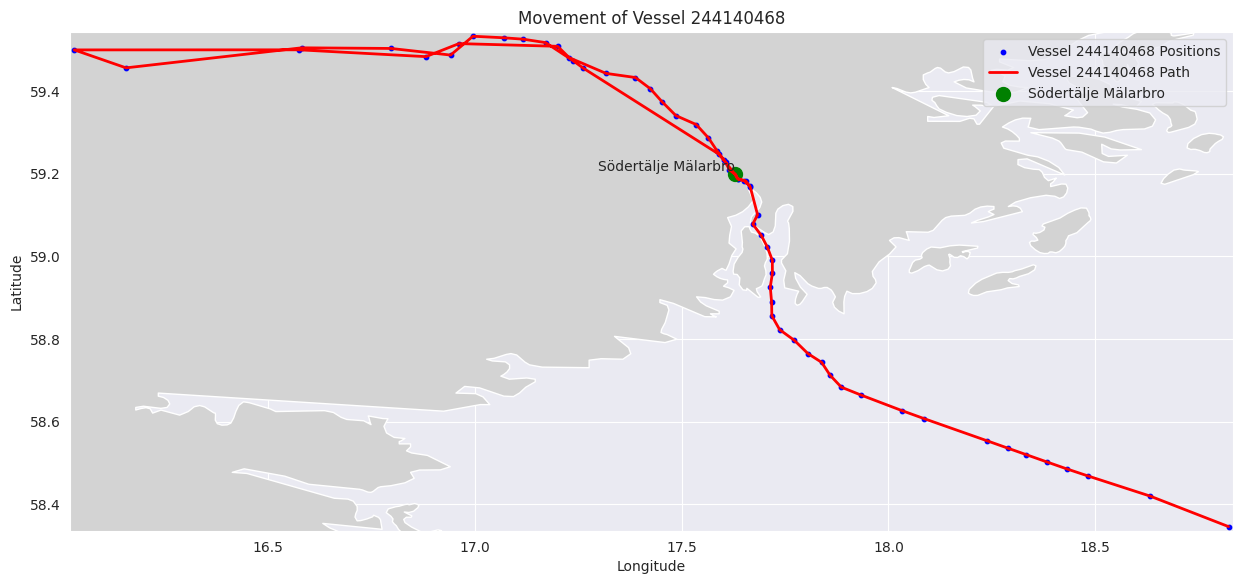

                      time   latitude  longitude             ship_name
75     2024-01-04 09:15:35  59.173752  17.664548  ESTEMAR             
289    2024-01-04 09:24:35  59.173757  17.664540  ESTEMAR             
439    2024-01-04 09:35:37  59.173755  17.664543  ESTEMAR             
544    2024-01-04 09:45:35  59.173763  17.664543  ESTEMAR             
755    2024-01-04 09:54:34  59.173765  17.664537  ESTEMAR             
...                    ...        ...        ...                   ...
70142  2024-01-06 23:39:57  59.963637  19.274420  ESTEMAR             
70345  2024-01-06 23:50:17  59.942750  19.321203  ESTEMAR             
72324  2024-01-07 01:19:56  59.764187  19.710085  ESTEMAR             
73314  2024-01-07 02:00:58  59.671648  19.866152  ESTEMAR             
74042  2024-01-07 02:30:58  59.605523  19.992655  ESTEMAR             

[327 rows x 4 columns]


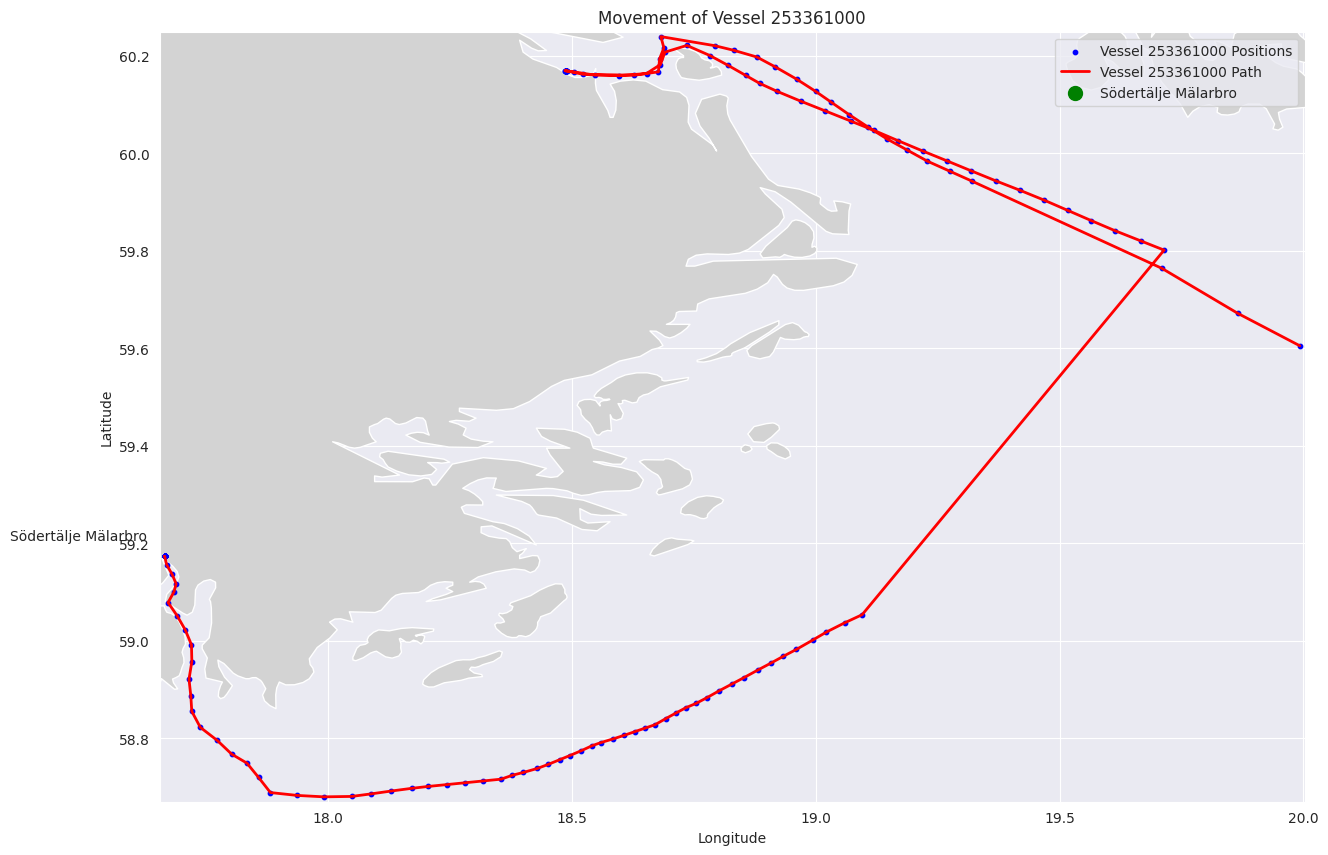

                       time   latitude  longitude             ship_name
127     2024-01-04 09:13:25  59.203762  17.623493  KBV 031             
306     2024-01-04 09:25:24  59.203758  17.623485  KBV 031             
454     2024-01-04 09:35:17  59.203757  17.623488  KBV 031             
591     2024-01-04 09:43:24  59.203757  17.623482  KBV 031             
676     2024-01-04 09:55:26  59.203762  17.623478  KBV 031             
...                     ...        ...        ...                   ...
103567  2024-01-08 17:37:23  59.203758  17.623487  KBV 031             
103639  2024-01-08 17:46:24  59.203758  17.623485  KBV 031             
103898  2024-01-08 17:58:25  59.203763  17.623487  KBV 031             
104223  2024-01-08 18:07:23  59.203757  17.623488  KBV 031             
104283  2024-01-08 18:16:24  59.203762  17.623482  KBV 031             

[472 rows x 4 columns]


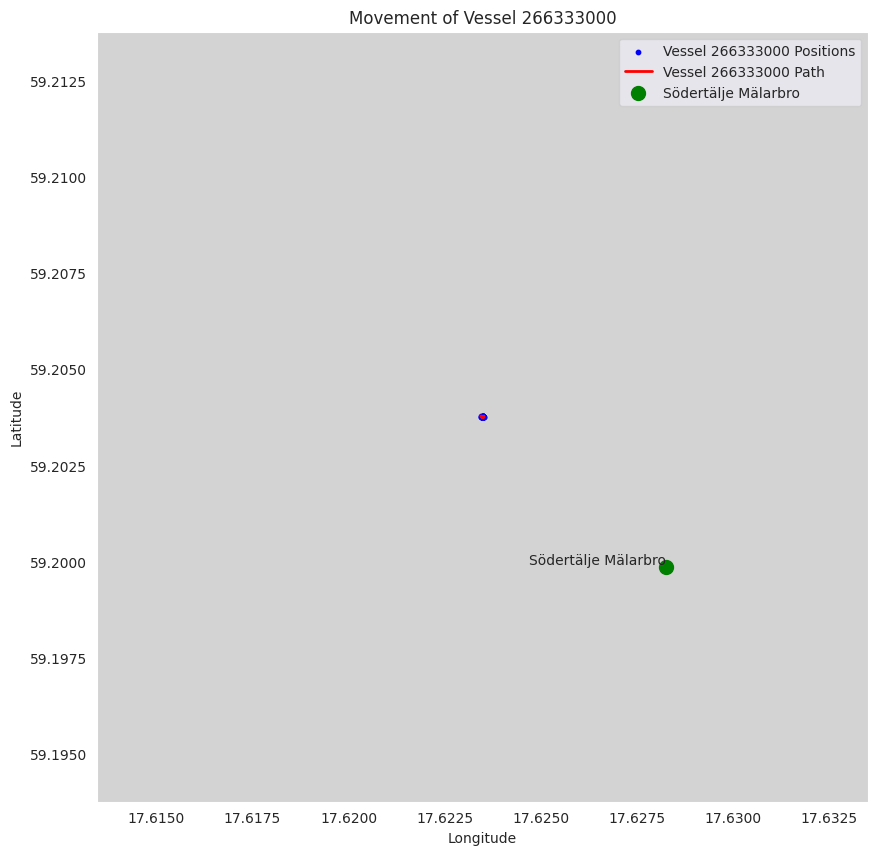

                      time   latitude  longitude       ship_name
47     2024-01-04 09:15:50  58.691752  17.940420  WILSON GARSTON
267    2024-01-04 09:25:39  58.700407  17.899570  WILSON GARSTON
391    2024-01-04 09:35:41  58.713302  17.866298  WILSON GARSTON
558    2024-01-04 09:45:01  58.733005  17.853070  WILSON GARSTON
626    2024-01-04 09:55:47  58.752077  17.829028  WILSON GARSTON
...                    ...        ...        ...             ...
54927  2024-01-06 12:07:37  58.810703  18.848618  WILSON GARSTON
55114  2024-01-06 12:18:09  58.818730  18.898685  WILSON GARSTON
55400  2024-01-06 12:28:06  58.826115  18.945967  WILSON GARSTON
55590  2024-01-06 12:37:53  58.833218  18.991083  WILSON GARSTON
55800  2024-01-06 12:48:03  58.841083  19.038682  WILSON GARSTON

[289 rows x 4 columns]


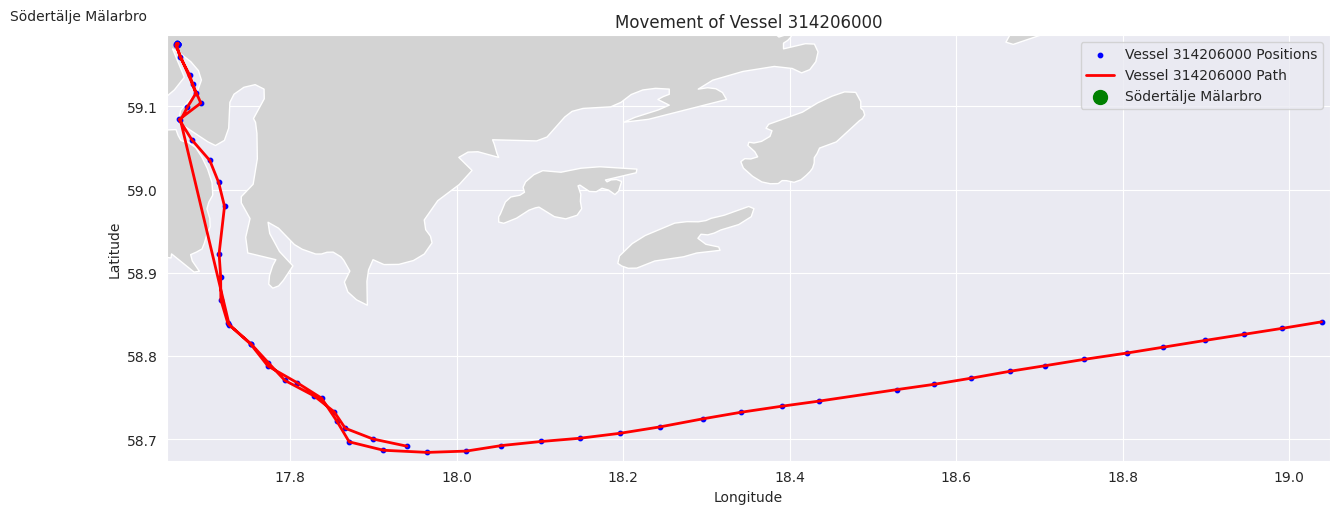

                      time   latitude  longitude             ship_name
429    2024-01-04 09:33:00  59.590037  16.521083  LINGEBORG           
623    2024-01-04 09:45:11  59.590033  16.521023  LINGEBORG           
880    2024-01-04 10:00:11  59.590062  16.521083  LINGEBORG           
1081   2024-01-04 10:12:10  59.590052  16.521065  LINGEBORG           
1707   2024-01-04 12:15:50  59.590080  16.521113  LINGEBORG           
...                    ...        ...        ...                   ...
52286  2024-01-06 10:07:13  58.705738  18.629743  LINGEBORG           
52452  2024-01-06 10:18:01  58.716005  18.685330  LINGEBORG           
52748  2024-01-06 10:28:00  58.725952  18.735735  LINGEBORG           
52938  2024-01-06 10:37:51  58.735230  18.786868  LINGEBORG           
53154  2024-01-06 10:46:51  58.743828  18.834652  LINGEBORG           

[262 rows x 4 columns]


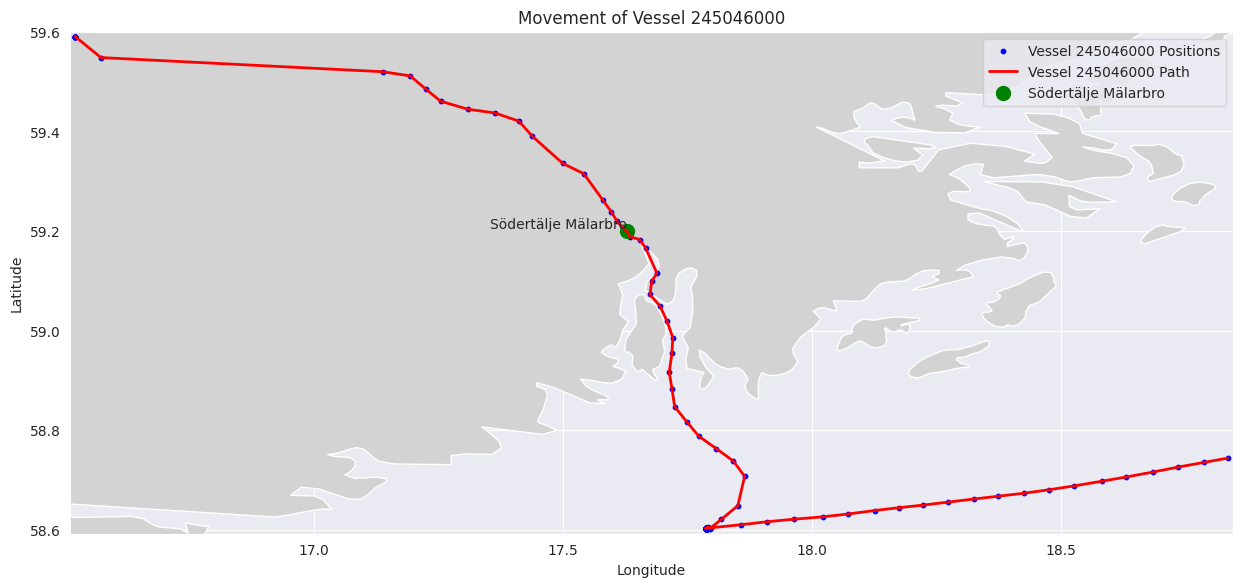

                      time   latitude  longitude ship_name
1867   2024-01-04 12:36:19  58.344352  17.769407     HANNI
2101   2024-01-04 12:46:51  58.362362  17.775235     HANNI
2273   2024-01-04 12:56:44  58.380792  17.781190     HANNI
2410   2024-01-04 13:06:41  58.399253  17.785853     HANNI
2526   2024-01-04 13:16:50  58.417902  17.790587     HANNI
...                    ...        ...        ...       ...
35011  2024-01-05 21:14:15  57.270925  17.264832     HANNI
35408  2024-01-05 21:34:27  57.198013  17.228233     HANNI
35776  2024-01-05 21:44:04  57.163892  17.211302     HANNI
35911  2024-01-05 21:54:16  57.127063  17.192072     HANNI
36164  2024-01-05 21:55:33  57.122887  17.189855     HANNI

[88 rows x 4 columns]


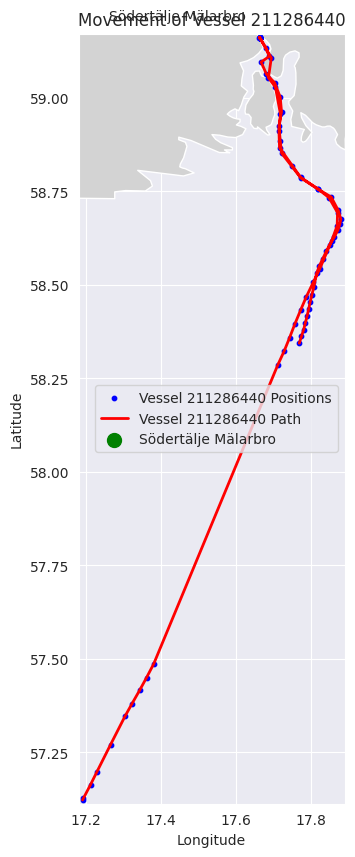

                      time   latitude  longitude             ship_name
7279   2024-01-04 18:17:49  59.171667  17.661283  TELLUS              
7441   2024-01-04 18:27:09  59.171683  17.661283  TELLUS              
7495   2024-01-04 18:37:35  59.171700  17.661300  TELLUS              
7706   2024-01-04 18:47:40  59.171683  17.661300  TELLUS              
7877   2024-01-04 18:58:01  59.171700  17.661267  TELLUS              
...                    ...        ...        ...                   ...
39991  2024-01-06 00:54:34  58.814733  18.982417  TELLUS              
40130  2024-01-06 01:04:27  58.825667  19.042900  TELLUS              
40342  2024-01-06 01:15:18  58.837733  19.109567  TELLUS              
40697  2024-01-06 01:25:18  58.848550  19.170100  TELLUS              
40926  2024-01-06 01:35:18  58.859250  19.230833  TELLUS              

[67 rows x 4 columns]


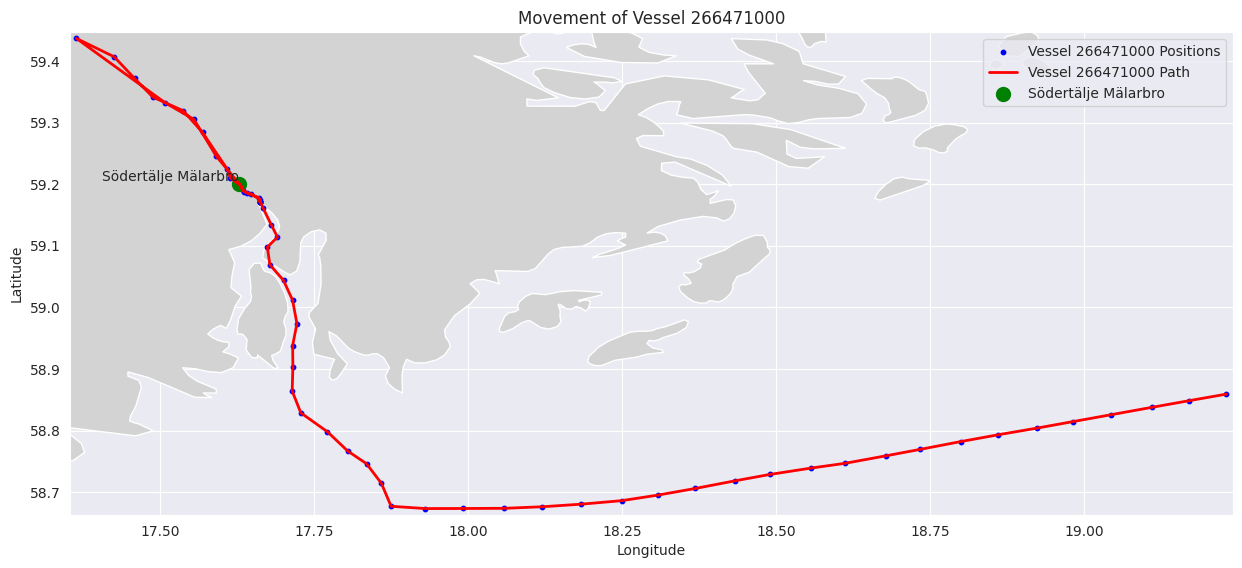

                      time   latitude  longitude             ship_name
82     2024-01-04 09:14:20  59.315355  18.023355              OSTANVIK
922    2024-01-04 10:02:20  59.315373  18.023375              OSTANVIK
995    2024-01-04 10:14:19  59.315373  18.023328              OSTANVIK
1247   2024-01-04 10:24:57  59.315335  18.023310  OSTANP"B9@@@        
1285   2024-01-04 10:33:38  59.315357  18.023277              OSTANVIK
1850   2024-01-04 12:26:19  59.315347  18.023338              OSTANVIK
2004   2024-01-04 12:33:37  59.315367  18.023378              OSTANVIK
2761   2024-01-04 13:26:22  59.315370  18.023352              OSTANVIK
2922   2024-01-04 13:36:36  59.315345  18.023363              OSTANVIK
3061   2024-01-04 13:45:41  59.315360  18.023380              OSTANVIK
3527   2024-01-04 14:15:40  59.315387  18.023377              OSTANVIK
3689   2024-01-04 14:26:24  59.315397  18.023338              OSTANVIK
3837   2024-01-04 14:33:39  59.315365  18.023367              OSTANVIK
3971  

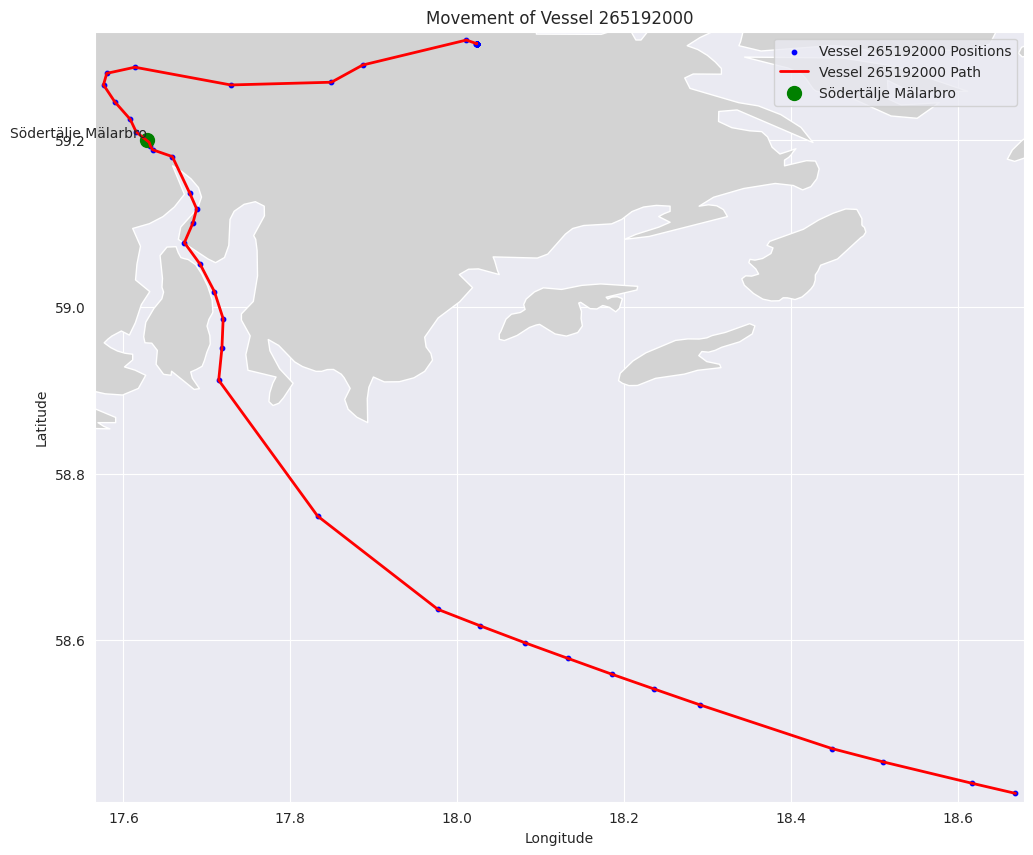

                      time   latitude  longitude             ship_name
8885   2024-01-04 19:57:53  59.517912  16.961328  WISBY WAVE          
9753   2024-01-04 20:57:34  59.515653  17.173890  WISBY WAVE          
9885   2024-01-04 21:07:45  59.494937  17.216570  WISBY WAVE          
10056  2024-01-04 21:18:05  59.469733  17.241995  WISBY WAVE          
10296  2024-01-04 21:28:05  59.446705  17.283057  WISBY WAVE          
10406  2024-01-04 21:38:14  59.438252  17.349572  WISBY WAVE          
10575  2024-01-04 21:47:33  59.426593  17.405925  WISBY WAVE          
10645  2024-01-04 21:57:53  59.392845  17.434115  WISBY WAVE          
10844  2024-01-04 22:07:33  59.361375  17.462662  WISBY WAVE          
10958  2024-01-04 22:17:54  59.332775  17.505717  WISBY WAVE          
11157  2024-01-04 22:28:25  59.305387  17.553602  WISBY WAVE          
11350  2024-01-04 22:37:43  59.273390  17.571160  WISBY WAVE          
11455  2024-01-04 22:47:44  59.243477  17.592293  WISBY WAVE          
11581 

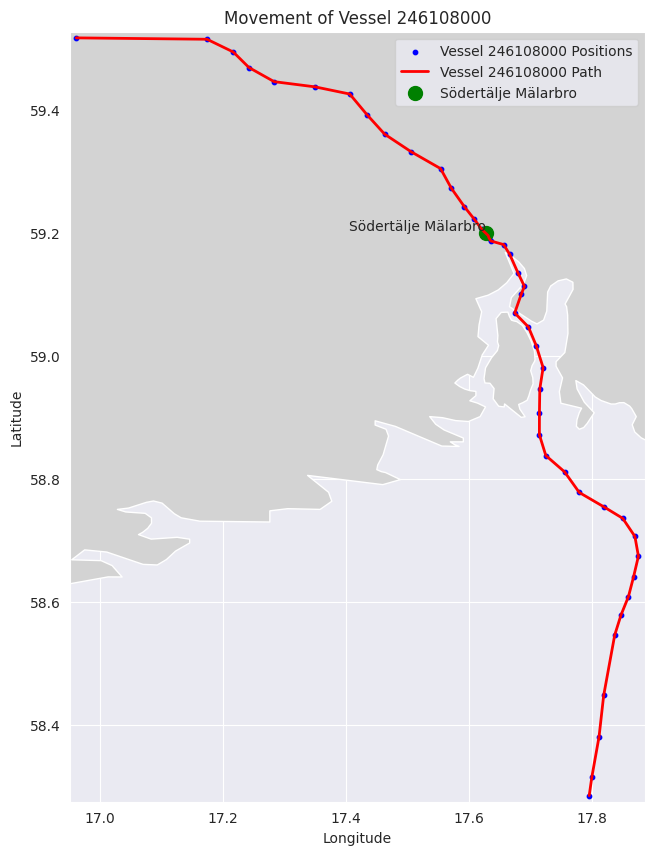

                      time   latitude  longitude             ship_name
6725   2024-01-04 17:47:20  58.285355  17.922108  SCHELDE HIGHWAY     
6930   2024-01-04 17:57:48  58.307808  17.916642  SCHELDE HIGHWAY     
7011   2024-01-04 18:07:21  58.328587  17.911952  SCHELDE HIGHWAY     
7438   2024-01-04 18:27:58  58.373308  17.904950  SCHELDE HIGHWAY     
7628   2024-01-04 18:47:38  58.419217  17.899450  SCHELDE HIGHWAY     
...                    ...        ...        ...                   ...
36787  2024-01-05 22:34:12  57.346302  17.339138  SCHELDE HIGHWAY     
36994  2024-01-05 22:44:52  57.305750  17.321340  SCHELDE HIGHWAY     
37511  2024-01-05 23:04:44  57.231108  17.287403  SCHELDE HIGHWAY     
37988  2024-01-05 23:25:00  57.153937  17.250395  SCHELDE HIGHWAY     
38206  2024-01-05 23:33:43  57.120773  17.235012  SCHELDE HIGHWAY     

[138 rows x 4 columns]


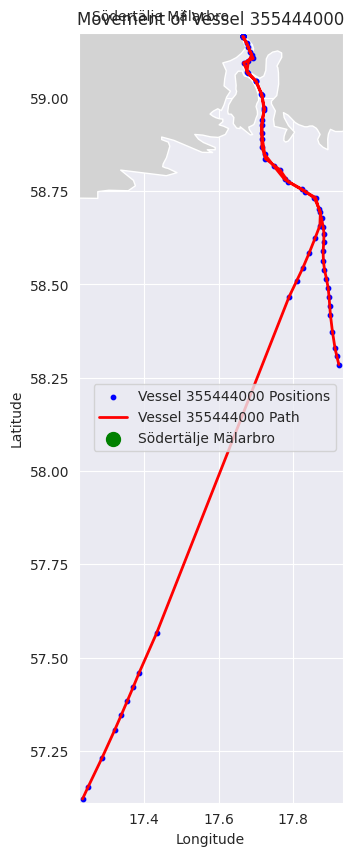

                      time   latitude  longitude             ship_name
1139   2024-01-04 10:25:58  60.361857  18.989160  LISTERVIK           
1355   2024-01-04 10:36:11  60.330323  18.997947  LISTERVIK           
1463   2024-01-04 12:06:15  60.087603  19.144628  LISTERVIK           
1620   2024-01-04 12:16:07  60.072943  19.164500  LISTERVIK           
1717   2024-01-04 12:26:39  60.056052  19.188987  LISTERVIK           
...                    ...        ...        ...                   ...
86841  2024-01-07 11:52:21  60.287165  19.033620  LISTERVIK           
87132  2024-01-07 12:01:51  60.317175  19.022532  LISTERVIK           
87296  2024-01-07 12:11:59  60.350587  19.025675  LISTERVIK           
95658  2024-01-08 11:35:04  60.938120  17.153015  LISTERVIK           
96869  2024-01-08 12:33:29  60.938165  17.152965  LISTERVIK           

[303 rows x 4 columns]


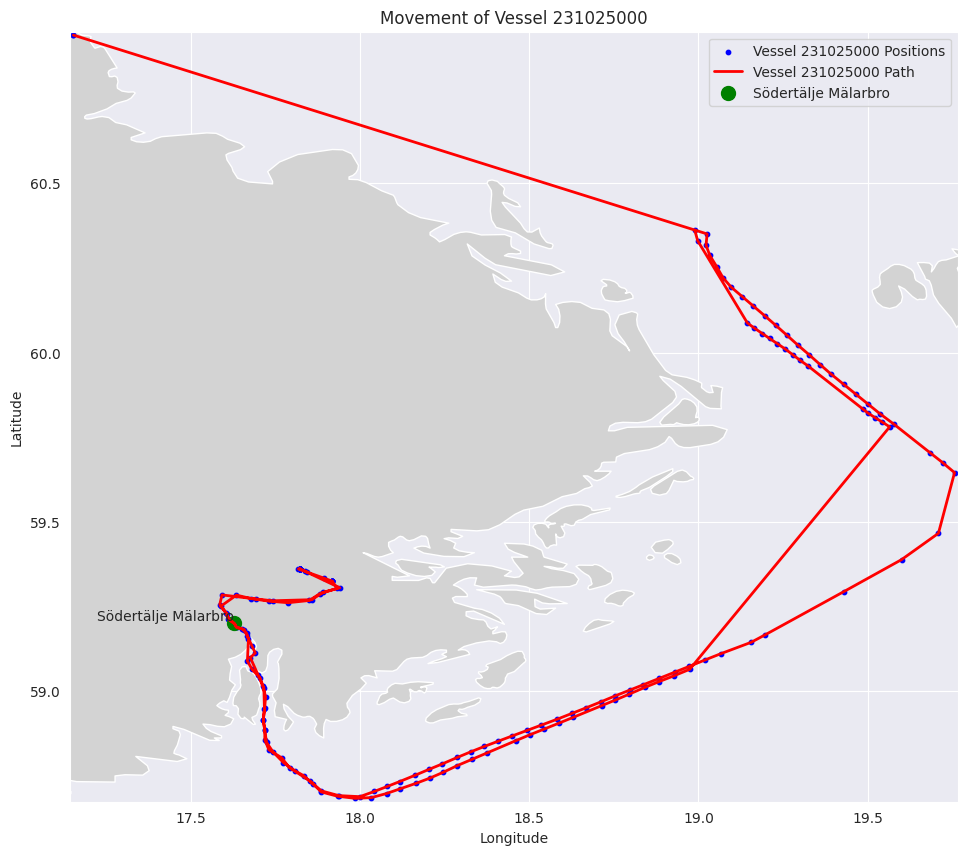

                      time   latitude  longitude             ship_name
14197  2024-01-05 01:38:10  58.354122  17.855588  CORAL IVORY         
14250  2024-01-05 01:48:34  58.382158  17.857553  CORAL IVORY         
14433  2024-01-05 01:59:01  58.408680  17.860512  CORAL IVORY         
14655  2024-01-05 02:08:57  58.435582  17.864445  CORAL IVORY         
14780  2024-01-05 02:19:10  58.460235  17.865270  CORAL IVORY         
...                    ...        ...        ...                   ...
62867  2024-01-06 17:51:41  59.501803  16.019698  CORAL IVORY         
65750  2024-01-06 20:04:48  59.501790  16.019730  CORAL IVORY         
77955  2024-01-07 05:16:12  59.501798  16.019695  CORAL IVORY         
84934  2024-01-07 10:16:40  59.501793  16.019697  CORAL IVORY         
92290  2024-01-08 09:06:36  59.501815  16.019705  CORAL IVORY         

[102 rows x 4 columns]


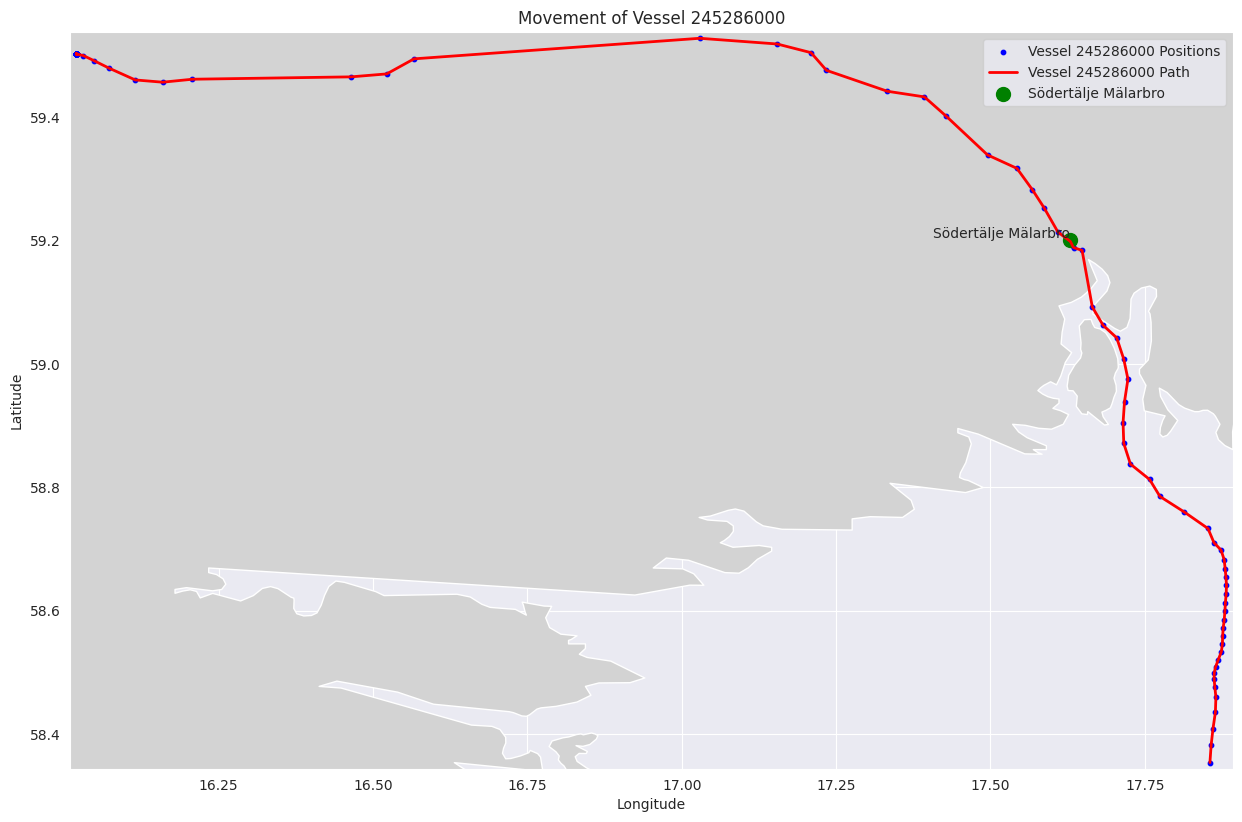

                      time   latitude  longitude     ship_name
2861   2024-01-04 13:35:26  59.449728  16.234607  RIX ATLANTIC
7165   2024-01-04 18:07:26  59.536988  16.588440  RIX ATLANTIC
10640  2024-01-04 21:42:39  59.591798  16.524217  RIX ATLANTIC
20819  2024-01-05 08:41:30  59.478817  17.229610  RIX ATLANTIC
21125  2024-01-05 09:01:31  59.446698  17.294532  RIX ATLANTIC
21407  2024-01-05 09:21:09  59.433833  17.383430  RIX ATLANTIC
21567  2024-01-05 09:31:13  59.416237  17.412817  RIX ATLANTIC
21898  2024-01-05 09:52:01  59.370202  17.454513  RIX ATLANTIC
22095  2024-01-05 10:01:30  59.349272  17.474405  RIX ATLANTIC
22386  2024-01-05 10:21:31  59.315370  17.539717  RIX ATLANTIC
22523  2024-01-05 10:31:41  59.292928  17.559622  RIX ATLANTIC
22656  2024-01-05 10:41:32  59.270135  17.574175  RIX ATLANTIC
22783  2024-01-05 10:51:12  59.247823  17.588317  RIX ATLANTIC
23249  2024-01-05 11:21:51  59.197085  17.630775  RIX ATLANTIC
23408  2024-01-05 11:31:31  59.193142  17.632382  RIX A

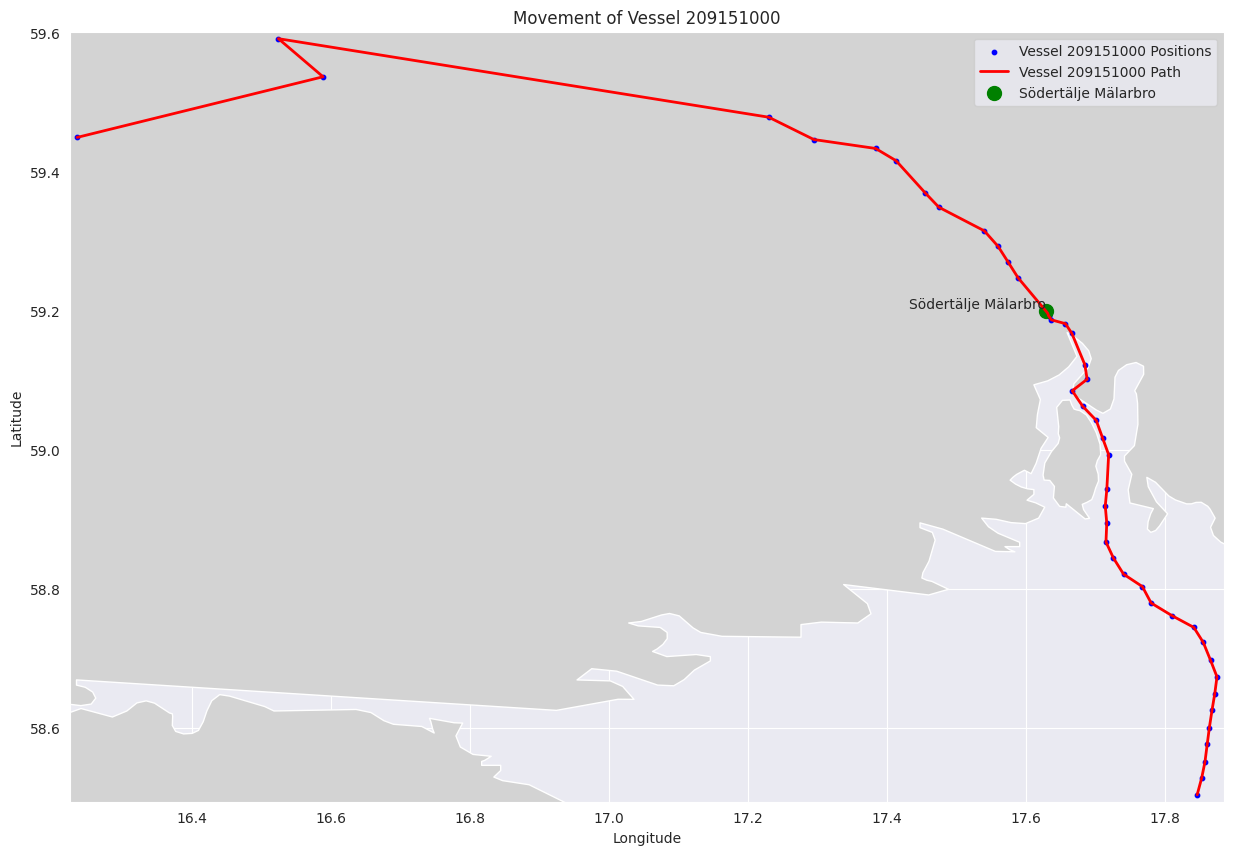

                       time   latitude  longitude             ship_name
25971   2024-01-05 14:23:08  59.191045  17.631147  CANDELA             
26373   2024-01-05 14:32:09  59.191048  17.631130  CANDELA             
26588   2024-01-05 14:41:09  59.191020  17.631145  CANDELA             
26614   2024-01-05 14:53:08  59.191043  17.631138  CANDELA             
27008   2024-01-05 15:02:08  59.191023  17.631148  CANDELA             
...                     ...        ...        ...                   ...
103398  2024-01-08 17:38:08  59.191040  17.631153  CANDELA             
103792  2024-01-08 17:47:08  59.191058  17.631123  CANDELA             
103965  2024-01-08 17:56:10  59.191037  17.631175  CANDELA             
104064  2024-01-08 18:08:10  59.191045  17.631163  CANDELA             
104431  2024-01-08 18:17:08  59.191033  17.631172  CANDELA             

[349 rows x 4 columns]


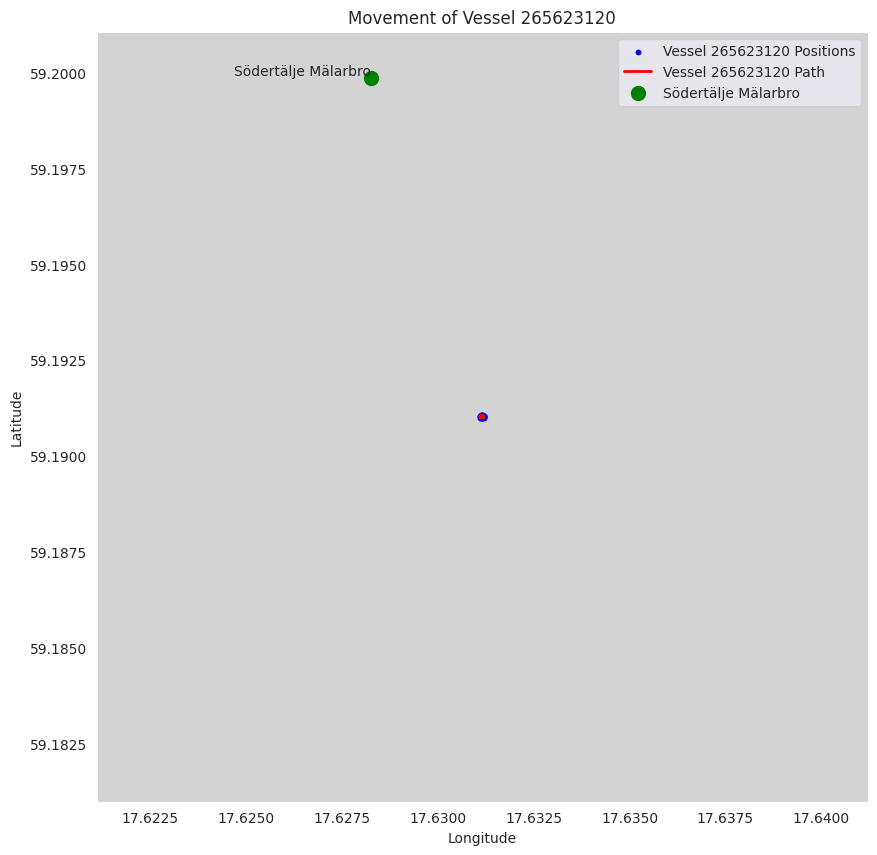

                       time   latitude  longitude             ship_name
26001   2024-01-05 14:22:25  59.191208  17.631142  VIRGO               
26365   2024-01-05 14:31:23  59.191203  17.631148  VIRGO               
26566   2024-01-05 14:42:56  59.191203  17.631127  VIRGO               
26634   2024-01-05 14:52:22  59.191217  17.631123  VIRGO               
27003   2024-01-05 15:01:23  59.191215  17.631142  VIRGO               
...                     ...        ...        ...                   ...
103566  2024-01-08 17:37:22  59.191207  17.631125  VIRGO               
103640  2024-01-08 17:46:22  59.191198  17.631128  VIRGO               
103894  2024-01-08 17:58:21  59.191183  17.631145  VIRGO               
104222  2024-01-08 18:07:22  59.191187  17.631152  VIRGO               
104284  2024-01-08 18:16:22  59.191182  17.631167  VIRGO               

[351 rows x 4 columns]


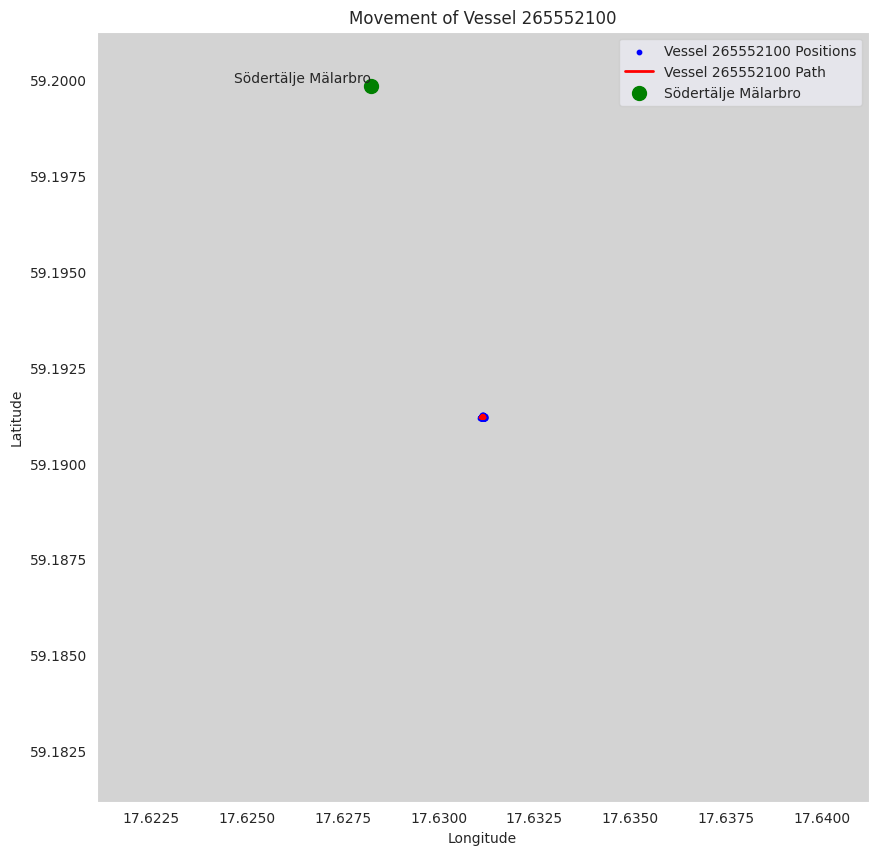

                       time   latitude  longitude     ship_name
26164   2024-01-05 14:23:05  59.286230  17.617662  JA ENHORNING
26761   2024-01-05 14:53:05  59.270908  17.560008  JA ENHORNING
27312   2024-01-05 15:22:04  59.265828  17.539973  JA ENHORNING
27897   2024-01-05 15:41:34  59.265827  17.539375           NaN
30911   2024-01-05 18:00:45  59.354538  17.964767  JA ENHORNING
31816   2024-01-05 18:41:43  59.354555  17.964840  JA ENHORNING
33154   2024-01-05 19:41:31  59.354577  17.964740           NaN
33824   2024-01-05 20:11:35  59.354578  17.964755  JA ENHORNING
35091   2024-01-05 21:11:34  59.354550  17.964792           NaN
35392   2024-01-05 21:23:10  59.354532  17.964827           NaN
35691   2024-01-05 21:38:36  59.354533  17.964815           NaN
36375   2024-01-05 22:11:42  59.354540  17.964767           NaN
38020   2024-01-05 23:23:21  59.354592  17.964732  JA ENHORNING
38315   2024-01-05 23:40:57  59.354567  17.964697  JA ENHORNING
39378   2024-01-06 00:23:20  59.354567  

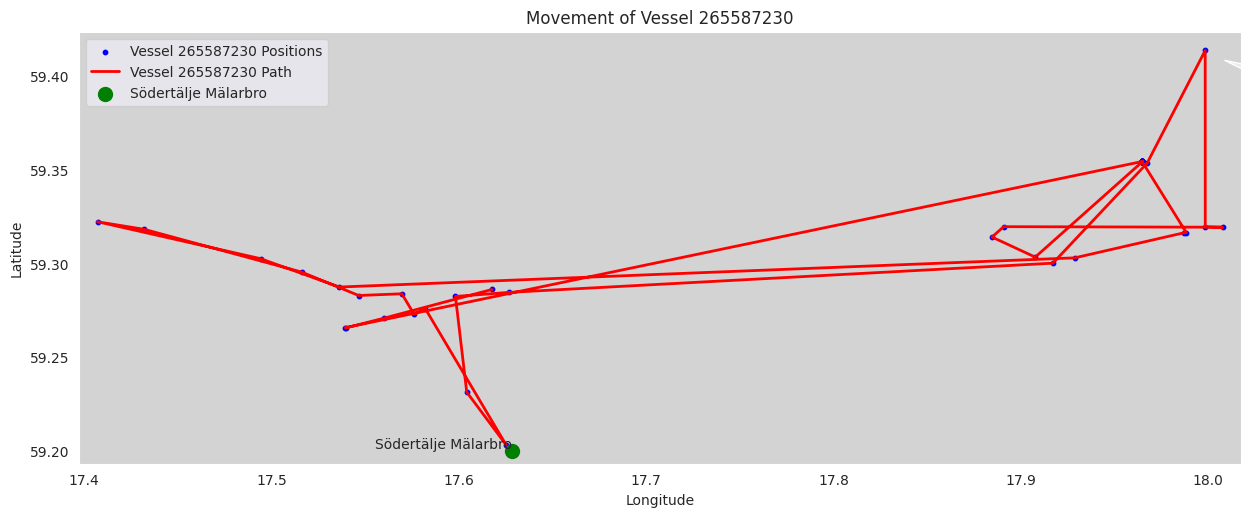

                       time   latitude  longitude             ship_name
26165   2024-01-05 14:22:21  59.191037  17.631353  PILOT 714 SE        
26363   2024-01-05 14:30:43  59.191005  17.631315  PILOT 714 SE        
26501   2024-01-05 14:42:42  59.191028  17.631340  PILOT 714 SE        
26812   2024-01-05 14:52:22  59.191013  17.631305  PILOT 714 SE        
26999   2024-01-05 15:00:41  59.191027  17.631312  PILOT 714 SE        
...                     ...        ...        ...                   ...
103351  2024-01-08 17:28:32  59.191030  17.631313  PILOT 714 SE        
103732  2024-01-08 17:48:41  59.191017  17.631328  PILOT 714 SE        
104015  2024-01-08 17:58:35  59.191017  17.631307  PILOT 714 SE        
104209  2024-01-08 18:06:41  59.191007  17.631342  PILOT 714 SE        
104361  2024-01-08 18:18:42  59.190988  17.631357  PILOT 714 SE        

[349 rows x 4 columns]


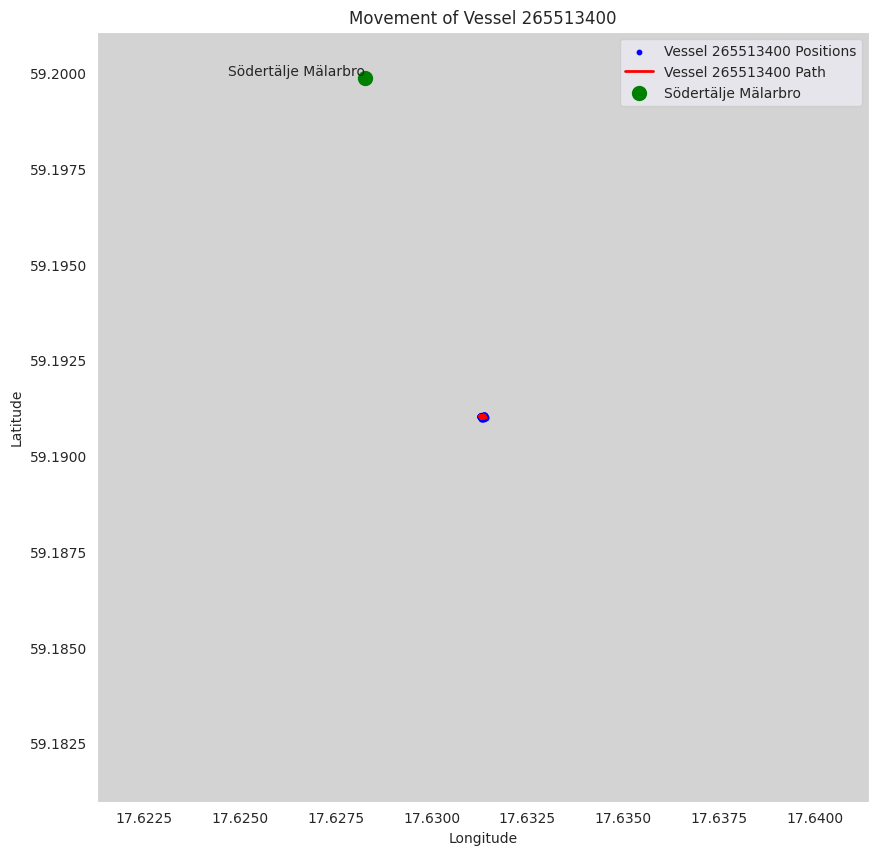

                       time   latitude  longitude    ship_name
26819   2024-01-05 14:52:42  59.186198  17.638902          NaN
27221   2024-01-05 15:11:17  59.186235  17.638872  SUAB SIGRID
27998   2024-01-05 15:53:19  59.186205  17.638890  SUAB SIGRID
29666   2024-01-05 17:01:57  59.186207  17.638893  SUAB SIGRID
29968   2024-01-05 17:23:35  59.186182  17.638837  SUAB SIGRID
...                     ...        ...        ...          ...
98954   2024-01-08 14:16:59  59.184863  17.642203  SUAB SIGRID
101813  2024-01-08 16:17:32  59.184978  17.642963  SUAB SIGRID
102044  2024-01-08 16:23:32  59.184943  17.642952          NaN
103791  2024-01-08 17:48:31  59.186213  17.638878          NaN
104040  2024-01-08 18:07:01  59.186187  17.638922  SUAB SIGRID

[62 rows x 4 columns]


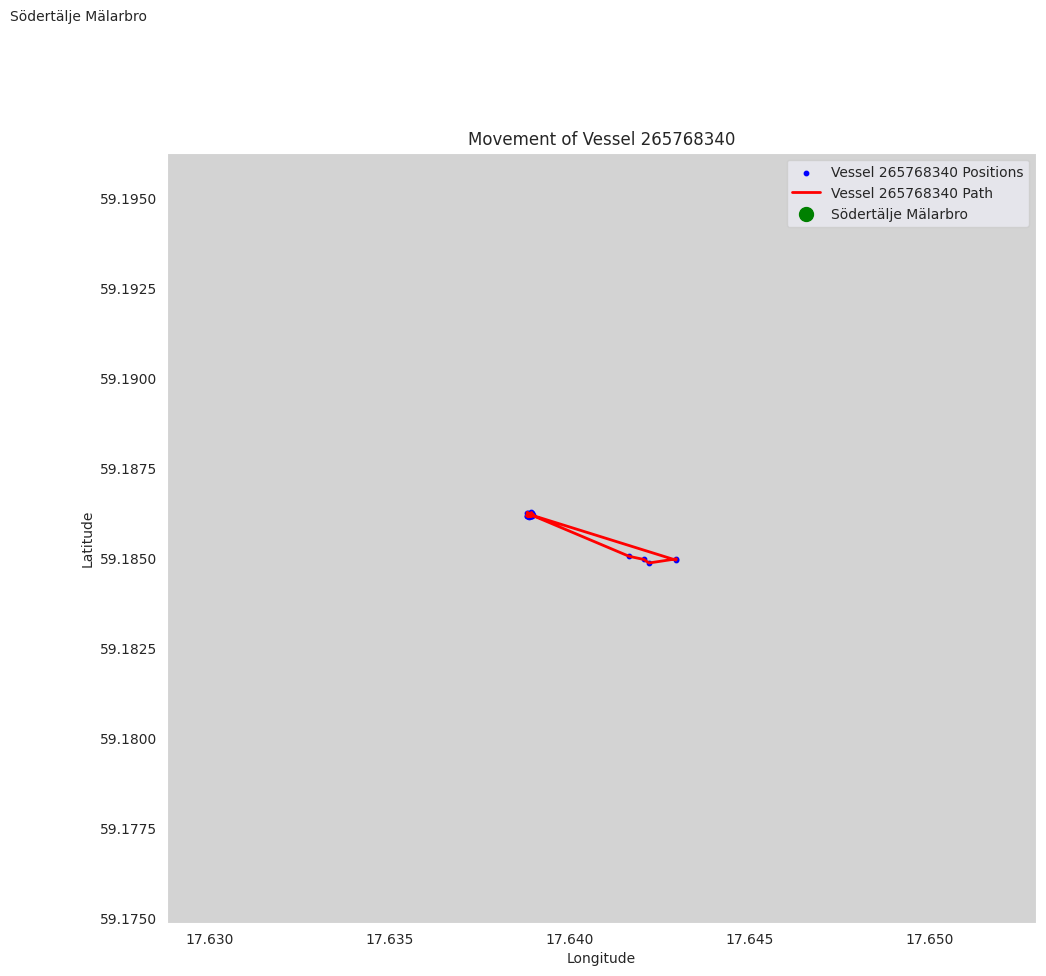

                      time   latitude  longitude             ship_name
3002   2024-01-04 13:42:54  59.587780  16.519002  SCOT ISLES          
5563   2024-01-04 16:19:40  59.587778  16.518998  SCOT ISLES          
10761  2024-01-04 21:55:34  59.587782  16.518972  SCOT ISLES          
12063  2024-01-04 23:28:37  59.587792  16.519003  SCOT ISLES          
19282  2024-01-05 06:55:38  59.587808  16.519002  SCOT ISLES          
24683  2024-01-05 12:46:37  59.587785  16.518973  SCOT ISLES          
31636  2024-01-05 18:31:50  59.587773  16.518983  SCOT ISLES          
32076  2024-01-05 18:52:59  59.587795  16.518977  SCOT ISLES          
33051  2024-01-05 19:43:29  59.538955  16.583335  SCOT ISLES          
33316  2024-01-05 19:51:21  59.532572  16.622505  SCOT ISLES          
34941  2024-01-05 21:03:37  59.514795  16.961183  SCOT ISLES          
35032  2024-01-05 21:14:00  59.527272  16.984208  SCOT ISLES          
36093  2024-01-05 22:04:44  59.490148  17.220467  SCOT ISLES          
36408 

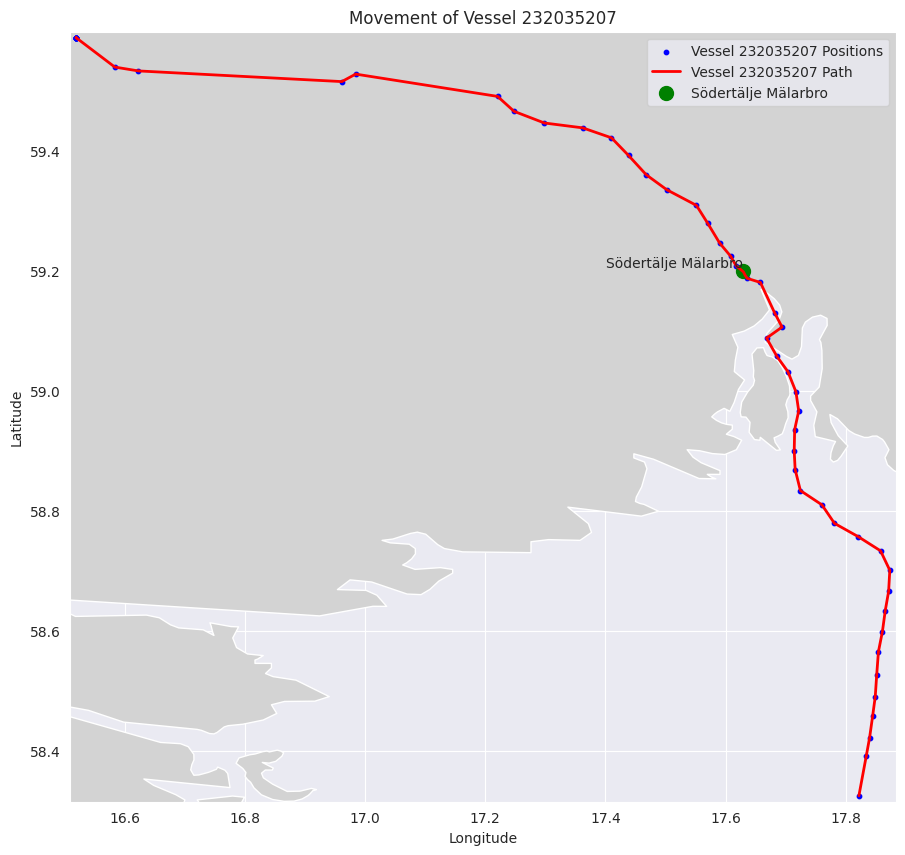

                       time   latitude  longitude ship_name
26430   2024-01-05 14:43:12  57.240262  17.282635  BJOERKOE
27047   2024-01-05 15:12:22  57.284950  17.295483  BJOERKOE
27610   2024-01-05 15:33:12  57.317017  17.304512  BJOERKOE
28206   2024-01-05 16:02:22  57.366727  17.320270  BJOERKOE
28380   2024-01-05 16:13:17  57.385892  17.326397  BJOERKOE
...                     ...        ...        ...       ...
103335  2024-01-08 17:27:40  59.175240  17.663723  BJOERKOE
103552  2024-01-08 17:36:40  59.175265  17.663698  BJOERKOE
103804  2024-01-08 17:48:40  59.175255  17.663687  BJOERKOE
104014  2024-01-08 17:57:40  59.175320  17.663690  BJOERKOE
104235  2024-01-08 18:08:21  59.173770  17.663780  BJOERKOE

[242 rows x 4 columns]


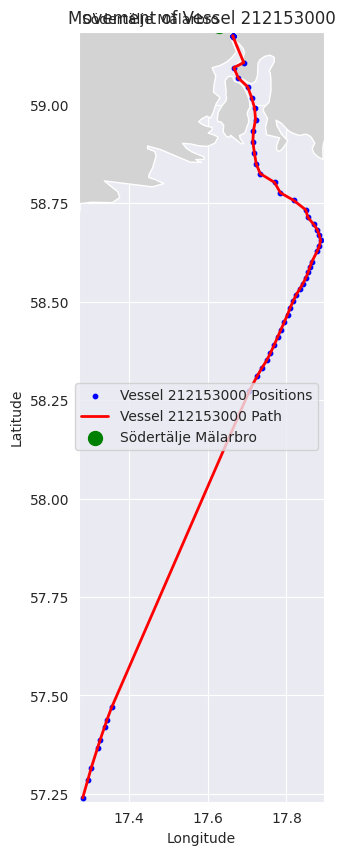

                      time   latitude  longitude      ship_name
48769  2024-01-06 07:27:28  58.410777  17.793147  CELTIC RAIDER
48976  2024-01-06 07:37:41  58.439147  17.802058  CELTIC RAIDER
49142  2024-01-06 07:46:51  58.469822  17.812130  CELTIC RAIDER
49320  2024-01-06 07:57:30  58.502030  17.822517  CELTIC RAIDER
49652  2024-01-06 08:07:40  58.531172  17.834695  CELTIC RAIDER
49817  2024-01-06 08:17:42  58.563240  17.844872  CELTIC RAIDER
50120  2024-01-06 08:27:22  58.592578  17.854845  CELTIC RAIDER
50225  2024-01-06 08:37:49  58.624292  17.844062  CELTIC RAIDER
50533  2024-01-06 08:47:21  58.653232  17.861095  CELTIC RAIDER
50719  2024-01-06 08:57:41  58.685013  17.869575  CELTIC RAIDER
50972  2024-01-06 09:07:54  58.716480  17.863763  CELTIC RAIDER
51185  2024-01-06 09:17:51  58.742255  17.847023  CELTIC RAIDER
51400  2024-01-06 09:27:31  58.758922  17.816283  CELTIC RAIDER
51594  2024-01-06 09:37:51  58.781137  17.777355  CELTIC RAIDER
51835  2024-01-06 09:47:08  58.807493  1

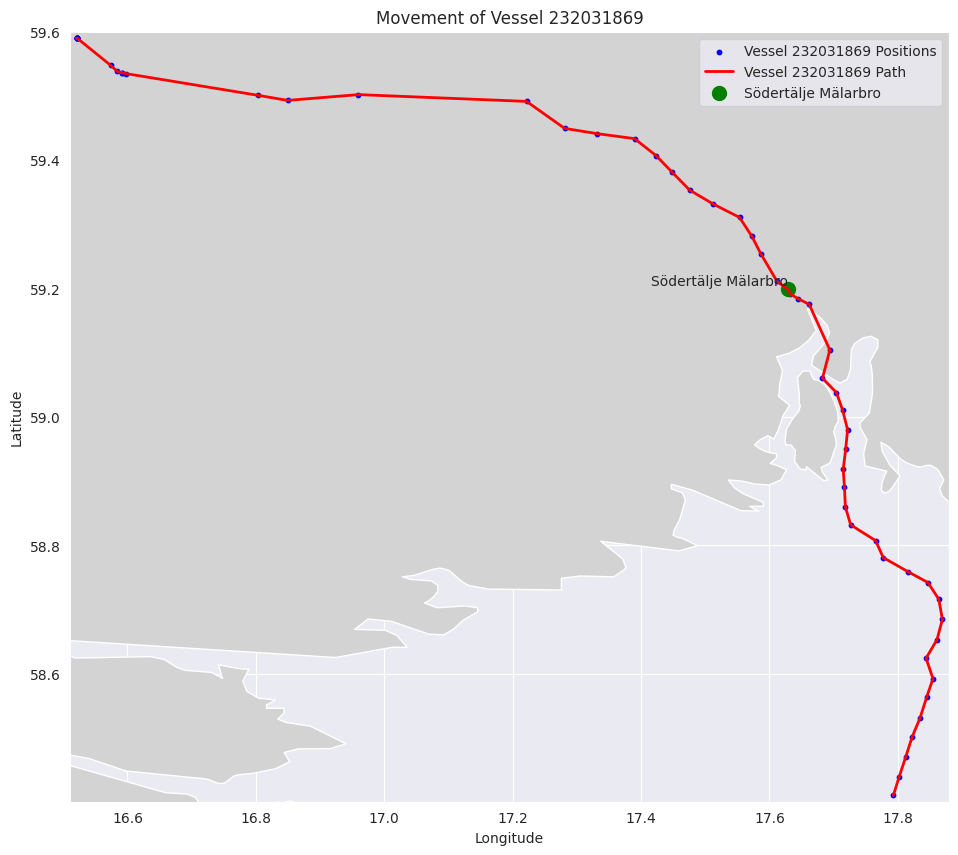

                      time   latitude  longitude ship_name
81     2024-01-04 09:12:37  59.502720  16.015983     HELAS
466    2024-01-04 09:32:23  59.502648  16.015895     HELAS
989    2024-01-04 10:14:27  59.502712  16.015998     HELAS
1405   2024-01-04 10:32:31  59.502653  16.015983     HELAS
1546   2024-01-04 12:02:36  59.499995  16.030400     HELAS
...                    ...        ...        ...       ...
75250  2024-01-07 03:30:46  58.375460  17.834063     HELAS
75531  2024-01-07 03:41:10  58.346093  17.831508     HELAS
75808  2024-01-07 03:50:29  58.318863  17.829143     HELAS
75945  2024-01-07 04:01:13  58.287477  17.826213     HELAS
76467  2024-01-07 04:20:57  58.228622  17.821248     HELAS

[247 rows x 4 columns]


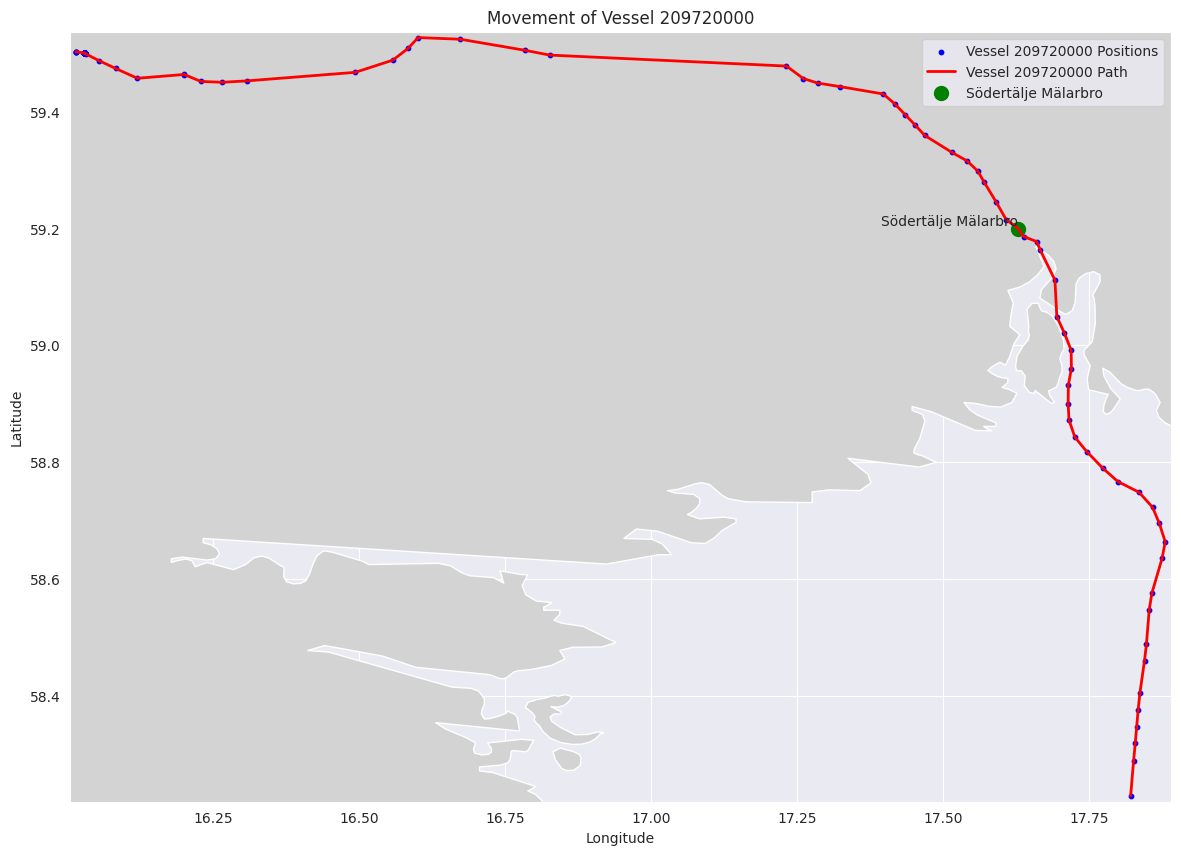

                      time   latitude  longitude        ship_name
35395  2024-01-05 21:22:55  59.501700  16.020583  TRITO NAVIGATOR
37140  2024-01-05 22:43:57  59.501683  16.020583  TRITO NAVIGATOR
37534  2024-01-05 23:01:58  59.501700  16.020583  TRITO NAVIGATOR
37799  2024-01-05 23:14:00  59.501700  16.020583  TRITO NAVIGATOR
38044  2024-01-05 23:25:05  59.501683  16.020583  TRITO NAVIGATOR
...                    ...        ...        ...              ...
77149  2024-01-07 04:50:52  58.374200  17.832100  TRITO NAVIGATOR
77304  2024-01-07 05:00:51  58.345250  17.827217  TRITO NAVIGATOR
77570  2024-01-07 05:10:44  58.316200  17.822367  TRITO NAVIGATOR
77842  2024-01-07 05:21:21  58.284583  17.816417  TRITO NAVIGATOR
78008  2024-01-07 05:30:50  58.256517  17.808067  TRITO NAVIGATOR

[107 rows x 4 columns]


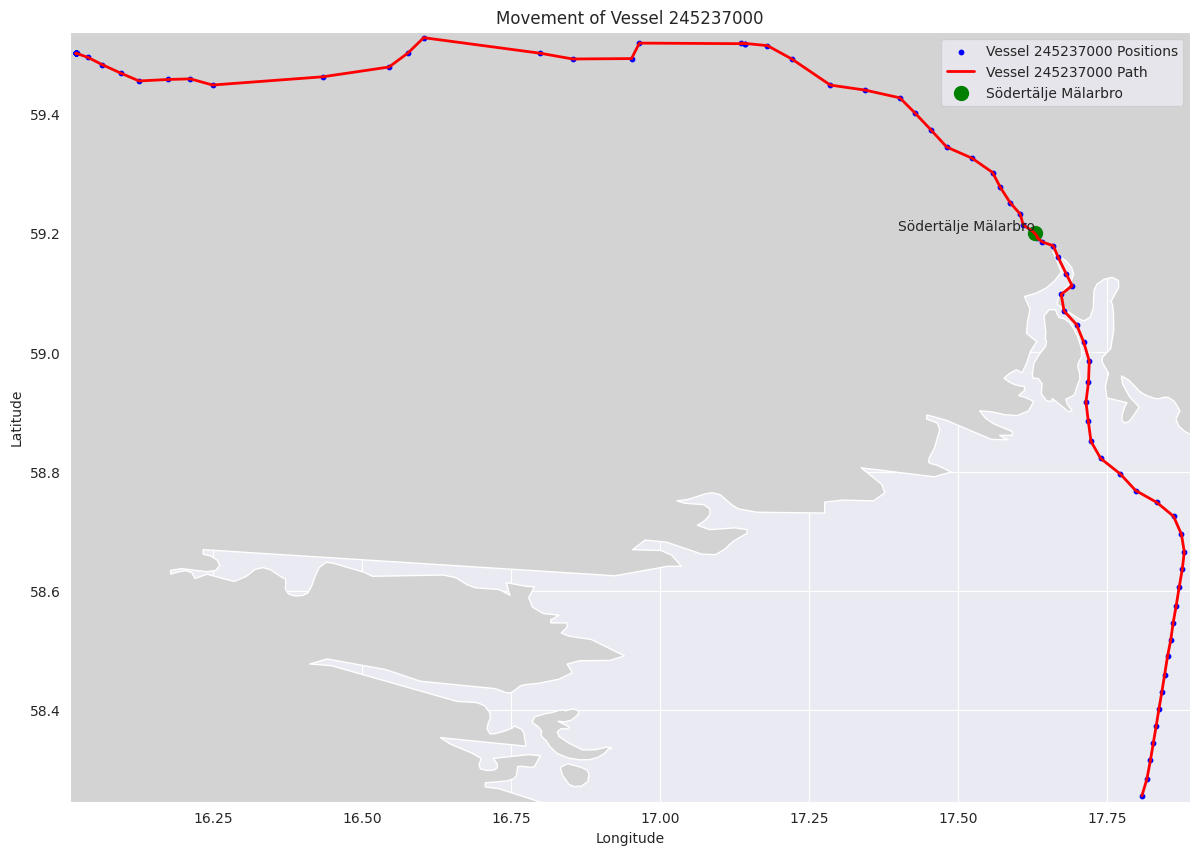

                      time   latitude  longitude             ship_name
291    2024-01-04 09:23:42  59.548777  17.538840  OSLO CARRIER 2      
403    2024-01-04 09:34:48  59.548777  17.538840  OSLO CARRIER 2      
619    2024-01-04 09:44:43  59.548773  17.538840  OSLO CARRIER 2      
720    2024-01-04 09:50:43  59.548775  17.538840  OSLO CARRIER 2      
916    2024-01-04 09:59:45  59.548962  17.538685  OSLO CARRIER 2      
...                    ...        ...        ...                   ...
88323  2024-01-07 12:52:11  59.172058  17.661095  OSLO CARRIER 2      
88538  2024-01-07 13:01:21  59.172043  17.661100  OSLO CARRIER 2      
88921  2024-01-07 13:21:31  59.172033  17.661107  OSLO CARRIER 2      
89060  2024-01-07 13:32:14  59.172038  17.661107  OSLO CARRIER 2      
89362  2024-01-07 13:41:49  59.172037  17.661107  OSLO CARRIER 2      

[339 rows x 4 columns]


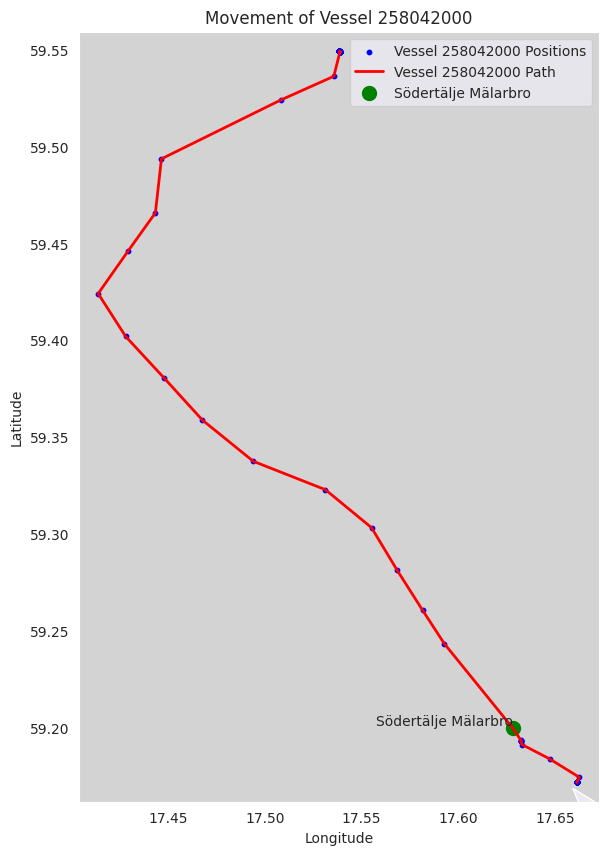

                      time   latitude  longitude             ship_name
78687  2024-01-07 06:01:21  58.272418  17.814207  ALVANITH            
79044  2024-01-07 06:11:05  58.293643  17.813985  ALVANITH            
79253  2024-01-07 06:21:15  58.316193  17.813545  ALVANITH            
79480  2024-01-07 06:30:54  58.337933  17.813448  ALVANITH            
79660  2024-01-07 06:41:44  58.360375  17.813840  ALVANITH            
79987  2024-01-07 06:51:32  58.379145  17.814432  ALVANITH            
80166  2024-01-07 07:01:15  58.398085  17.814433  ALVANITH            
80409  2024-01-07 07:11:05  58.417313  17.814387  ALVANITH            
80593  2024-01-07 07:21:14  58.437748  17.813528  ALVANITH            
80820  2024-01-07 07:31:42  58.459002  17.812850  ALVANITH            
81137  2024-01-07 07:41:04  58.476948  17.815212  ALVANITH            
81234  2024-01-07 07:51:22  58.496137  17.818733  ALVANITH            
81506  2024-01-07 08:01:44  58.514800  17.820870  ALVANITH            
81798 

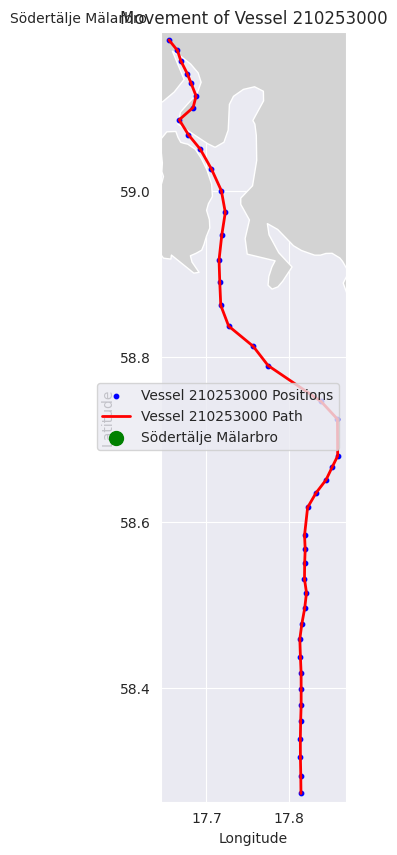

                       time   latitude  longitude ship_name
49602   2024-01-06 08:06:30  59.353610  18.110372       TOM
51152   2024-01-06 09:12:31  59.348292  18.124498       TOM
65633   2024-01-06 20:08:39  59.311640  18.129482       NaN
85125   2024-01-07 10:30:24  59.311647  18.129430       TOM
87957   2024-01-07 12:36:42  59.311757  18.129432       TOM
91484   2024-01-08 08:27:05  59.274357  17.663745       TOM
91549   2024-01-08 08:36:19  59.283553  17.633340       TOM
93311   2024-01-08 09:58:00  59.201755  17.626473       TOM
95236   2024-01-08 11:27:59  59.194833  17.632203       TOM
100492  2024-01-08 15:18:22  59.192843  17.632317       TOM
104199  2024-01-08 18:06:19  59.203162  17.625748       TOM


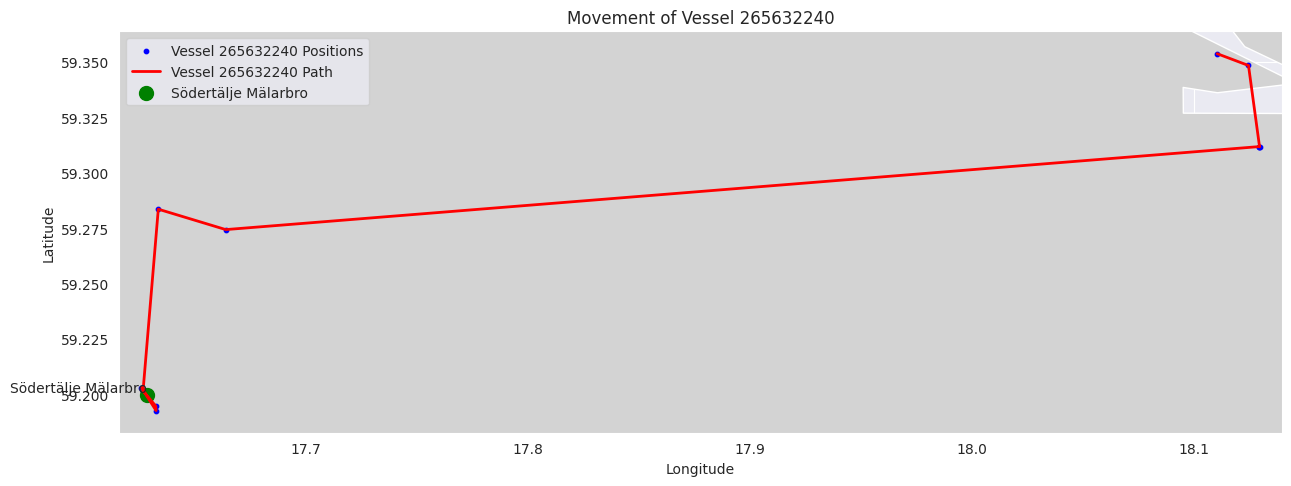

                       time   latitude  longitude             ship_name
93889   2024-01-08 10:18:06  59.199230  17.628510  SAUB KRONBALKSPONTON
101280  2024-01-08 15:58:23  59.198302  17.629517  SAUB KRONBALKSPONTON
101598  2024-01-08 16:07:43  59.198290  17.629483  SAUB KRONBALKSPONTON
101929  2024-01-08 16:25:43  59.200602  17.627133  SAUB KRONBALKSPONTON


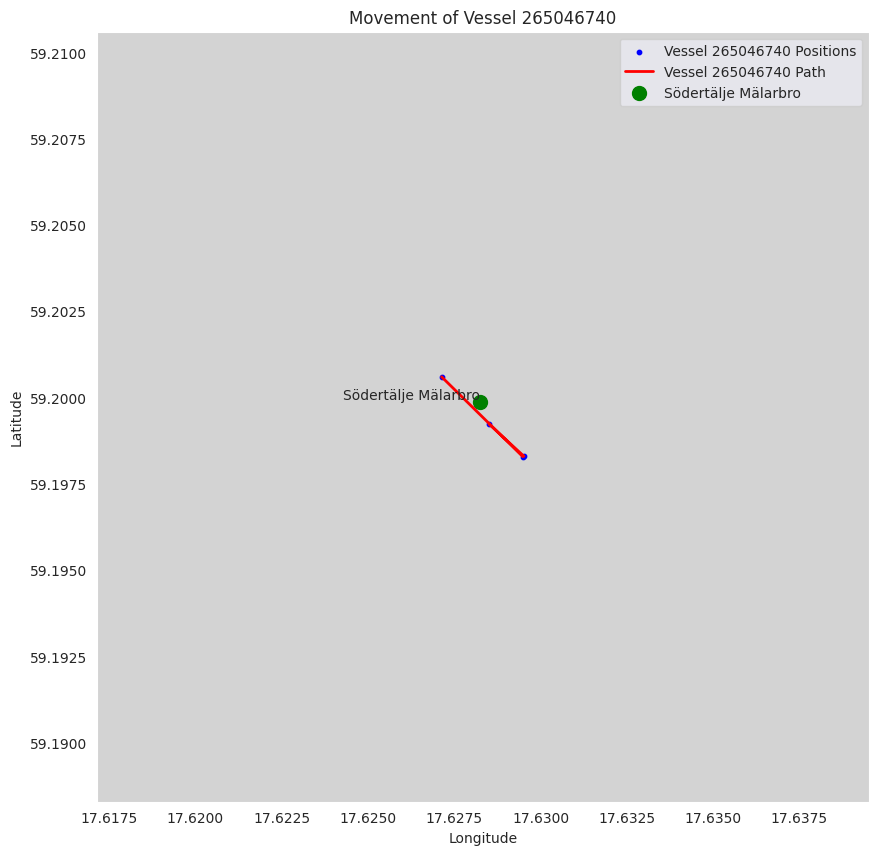

                       time   latitude  longitude   ship_name
91439   2024-01-08 08:27:00  57.951955  17.559515  BALTICBORG
91540   2024-01-08 08:37:32  57.999798  17.580670  BALTICBORG
92054   2024-01-08 08:57:00  58.087758  17.620152  BALTICBORG
92205   2024-01-08 09:07:32  58.134598  17.640588  BALTICBORG
92964   2024-01-08 09:37:53  58.270817  17.702018  BALTICBORG
93198   2024-01-08 09:47:24  58.314362  17.720648  BALTICBORG
93333   2024-01-08 09:57:42  58.361682  17.741452  BALTICBORG
93574   2024-01-08 10:08:05  58.408565  17.762983  BALTICBORG
93861   2024-01-08 10:17:33  58.451117  17.782882  BALTICBORG
94040   2024-01-08 10:27:54  58.499077  17.805522  BALTICBORG
94265   2024-01-08 10:37:16  58.541315  17.823323  BALTICBORG
94381   2024-01-08 10:47:50  58.589247  17.843940  BALTICBORG
94684   2024-01-08 10:57:53  58.635073  17.867372  BALTICBORG
94862   2024-01-08 11:08:06  58.680368  17.873797  BALTICBORG
95148   2024-01-08 11:17:40  58.708742  17.866955  BALTICBORG
95304   

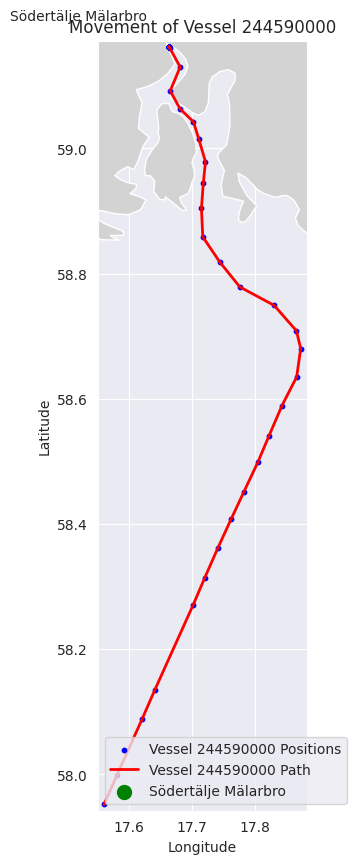

                      time   latitude  longitude             ship_name
97632  2024-01-08 13:06:02  59.184948  17.641742  SEA 3               
Could not plot path for: 265782800
Reson:  IllegalArgumentException: point array must contain 0 or >1 elements

                       time   latitude  longitude             ship_name
104239  2024-01-08 18:08:25  59.168000  17.665500  GUNGA               
104347  2024-01-08 18:17:36  59.149167  17.673667  GUNGA               


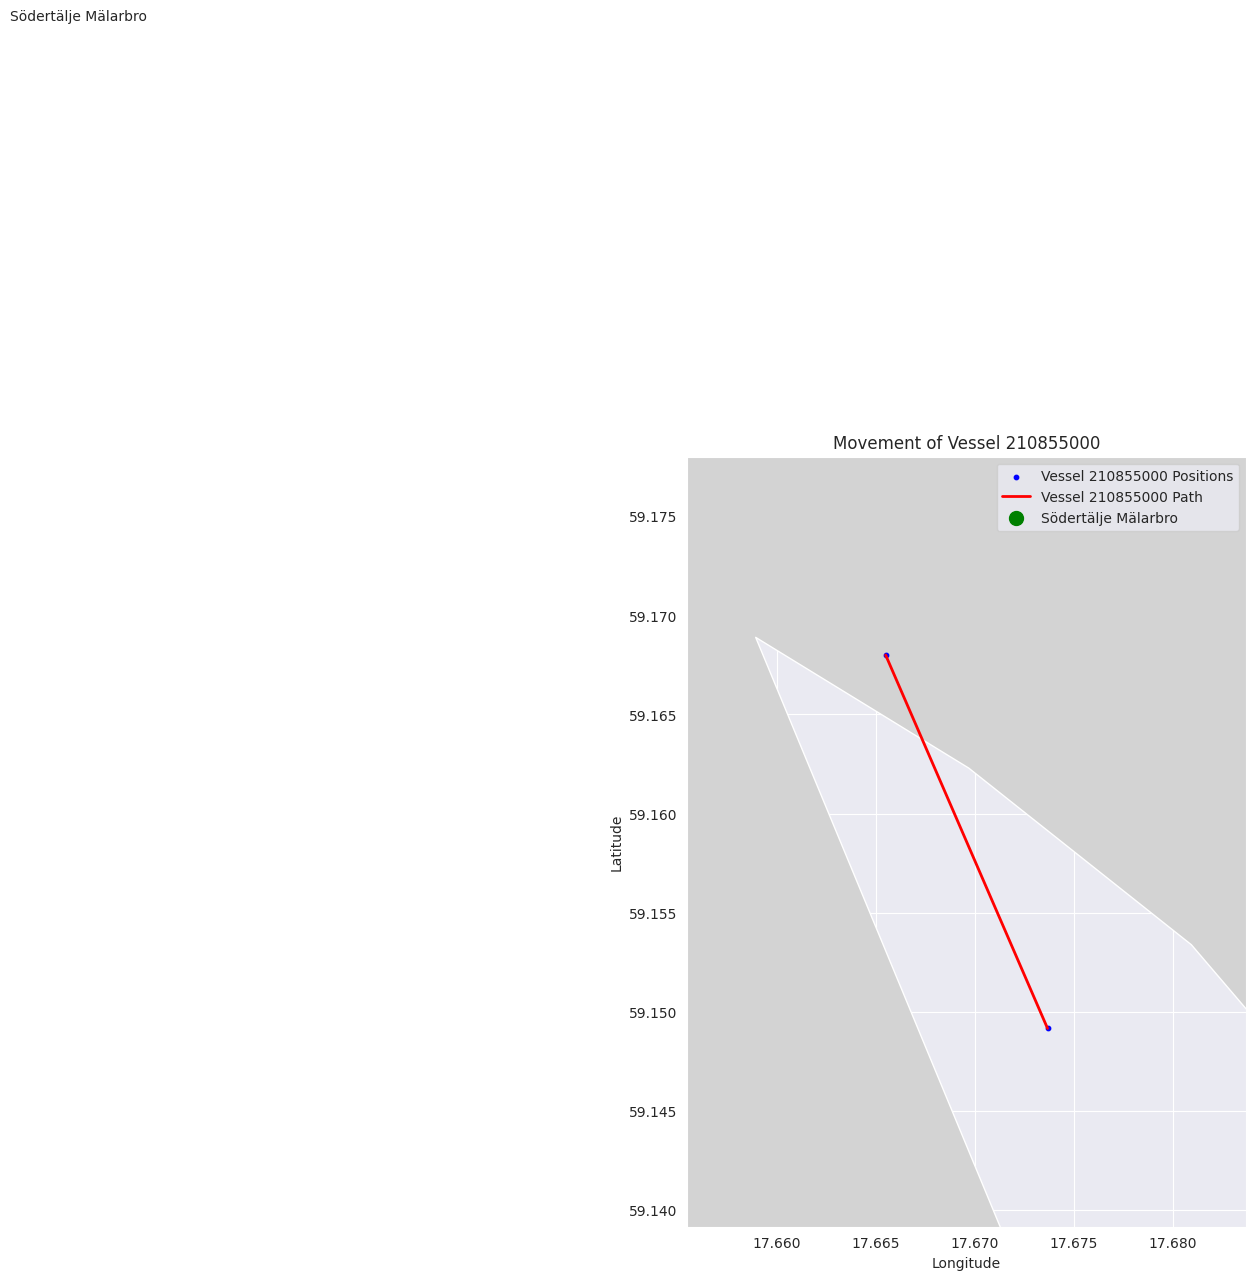

In [23]:
for cur_vessel_id in inside_bbox['ship_id'].unique():
    plot_vessel(cur_vessel_id)